In [32]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist, pdist

In [9]:
with open('./lvq_res.pickle','rb') as f:
    res = pickle.load(f)

In [219]:
# select dataset and encoding type
dataName = 'allHV.npz'
emgHVType =  'hvRel'

allHV = np.load(dataName)

# extract data and labels based on gesture, trial, and position
hv = allHV[emgHVType]
gestLabel = allHV['gestLabel']
posLabel = allHV['posLabel']
trialLabel = allHV['trialLabel']

# get list of unique values for each label
gestures = np.unique(gestLabel)
positions = np.unique(posLabel)
trials = np.unique(trialLabel)

numGestures = len(gestures)
numPositions = len(positions)
numTrials = len(trials)

# get data size info
D = hv.shape[1] # hypervector dimension
numHV = 80 # number of examples per trial

# color palettes for plotting
gPalette = sns.color_palette('Paired', numGestures)
pPalette = sns.color_palette('Paired', numPositions)

sns.set_context('talk')

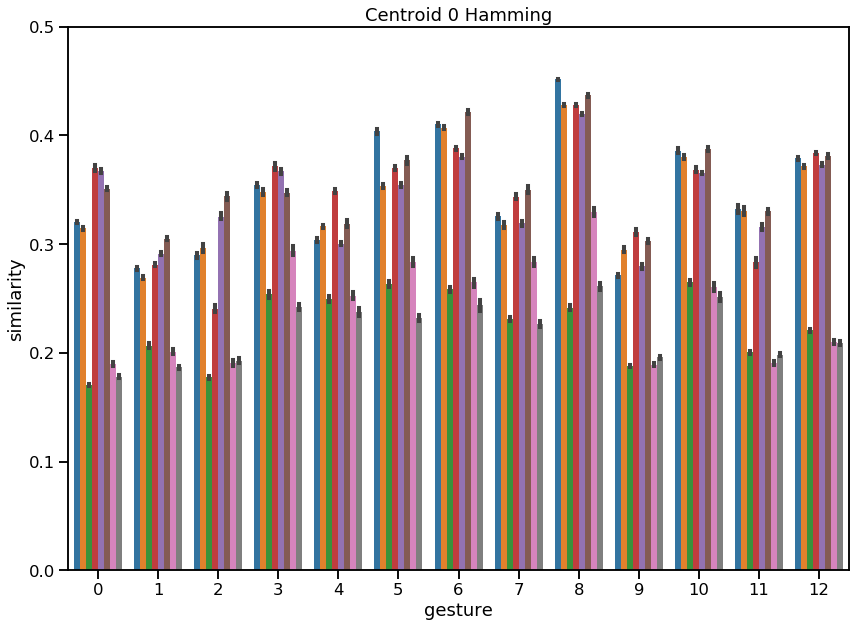

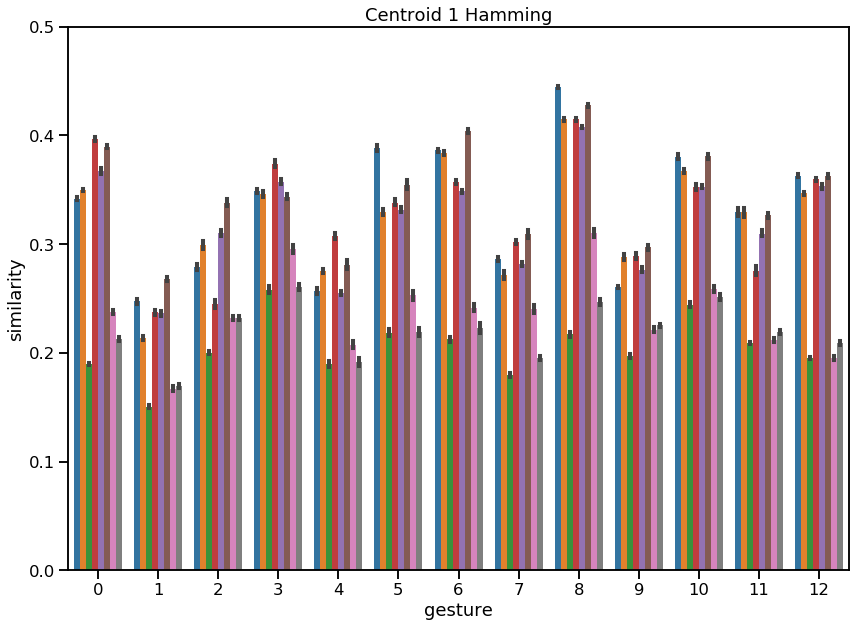

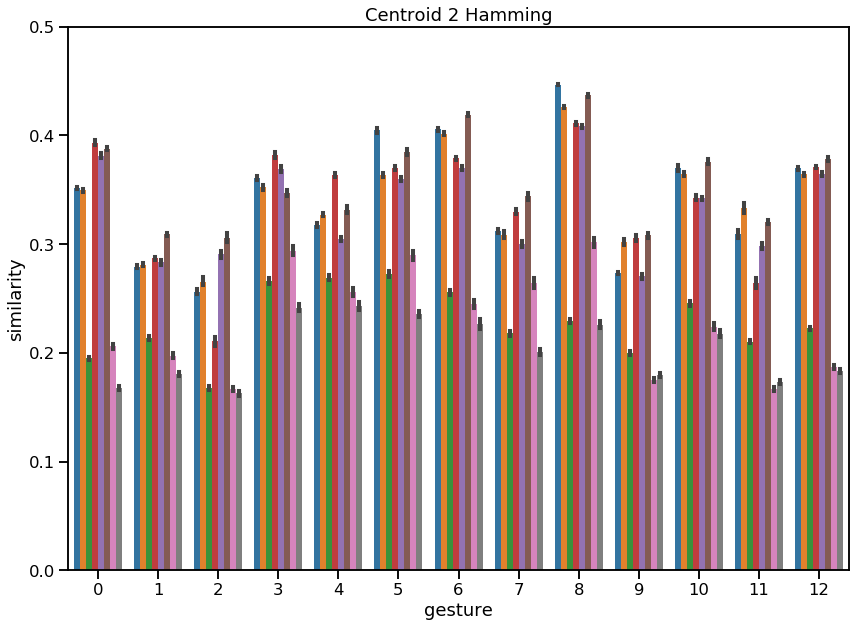

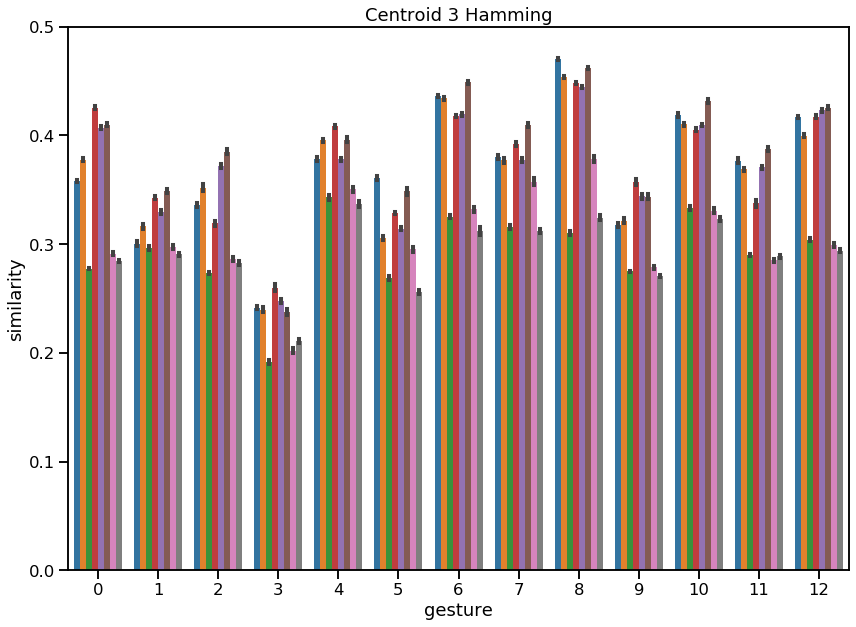

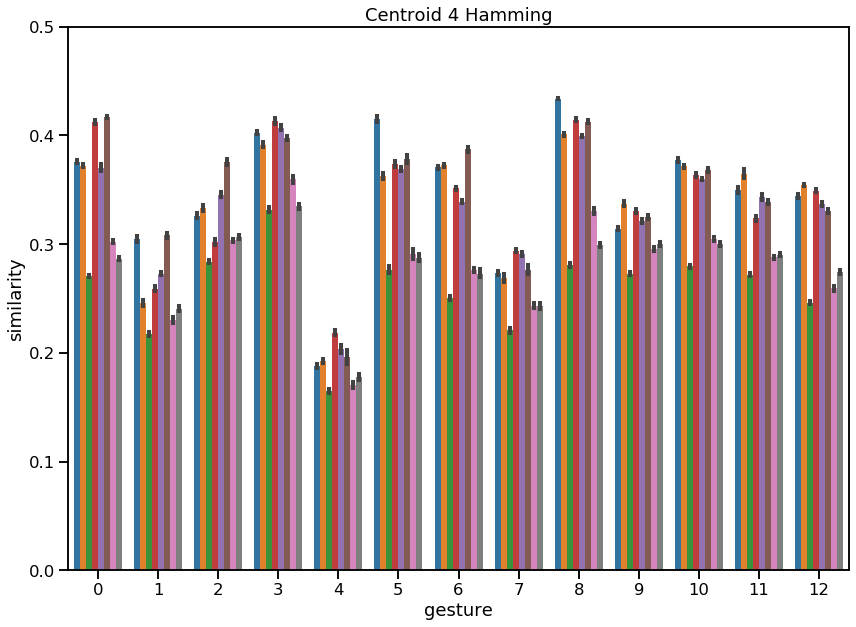

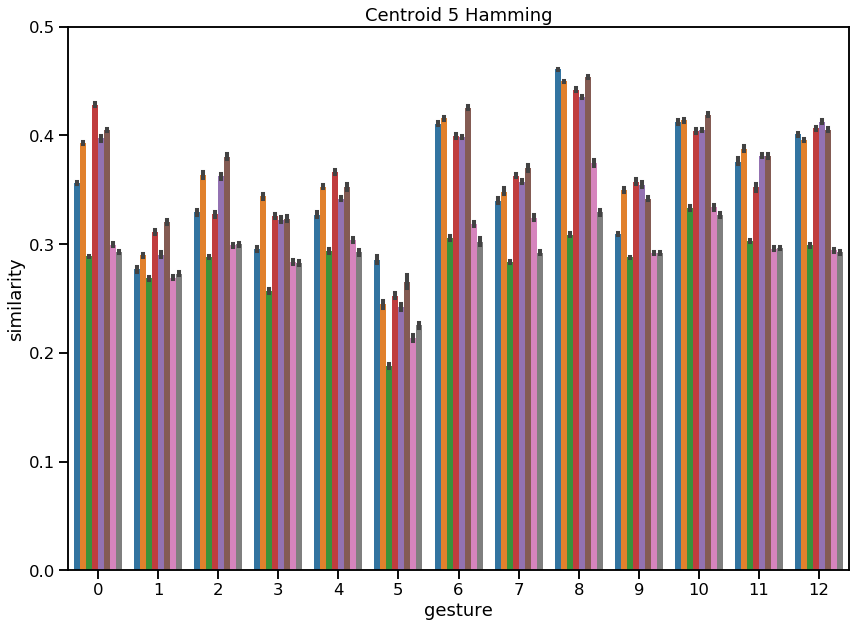

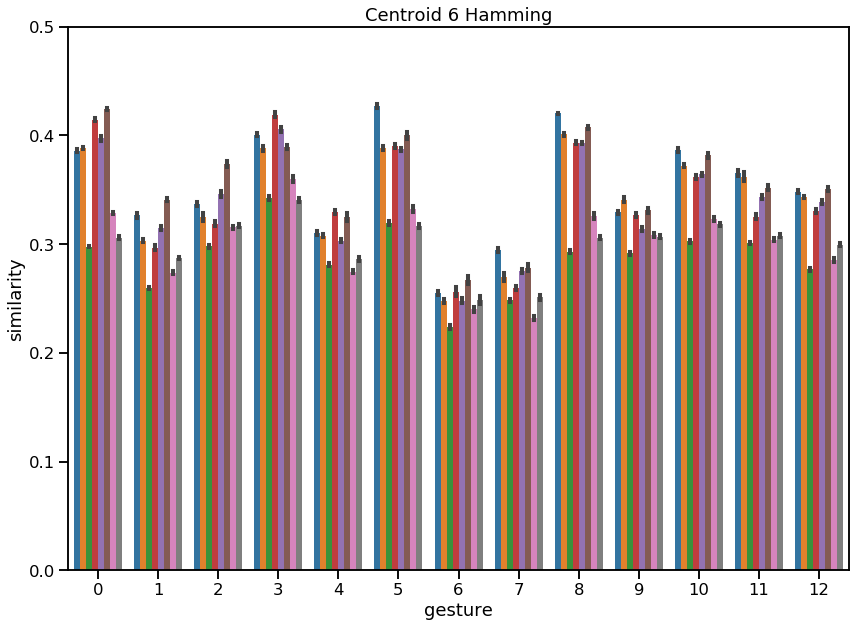

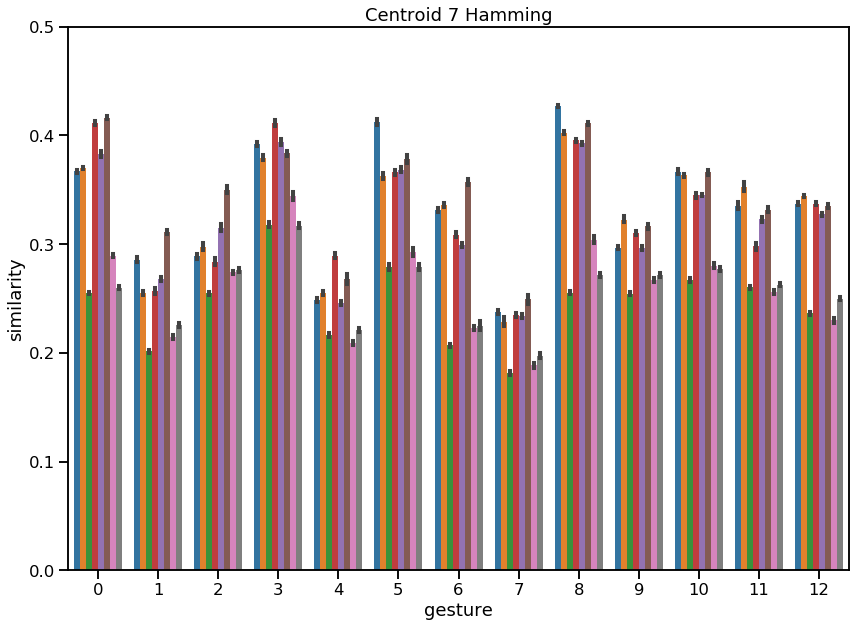

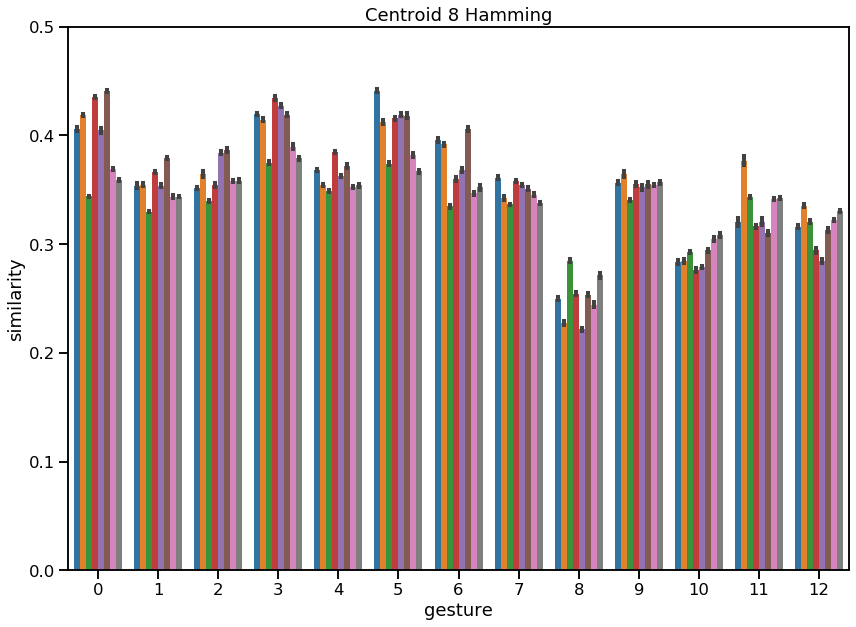

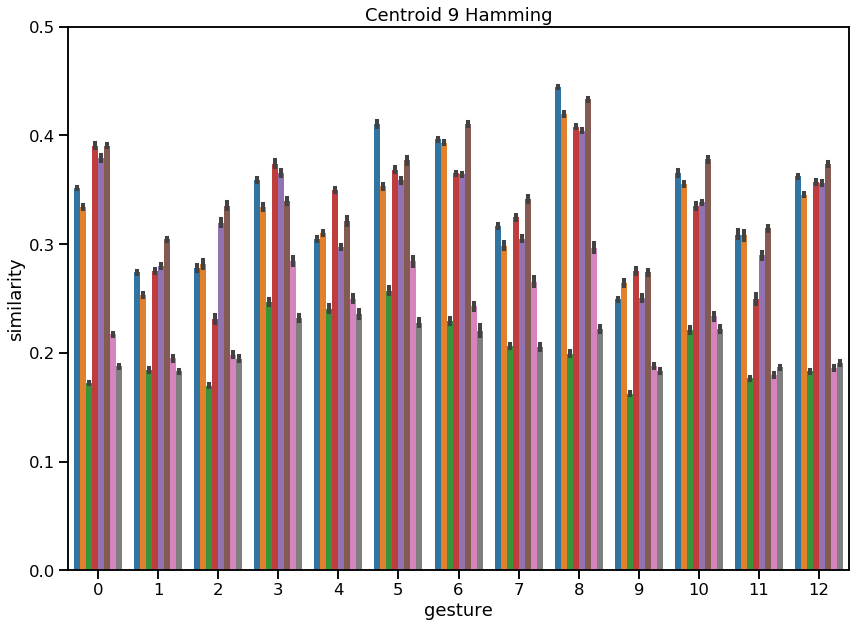

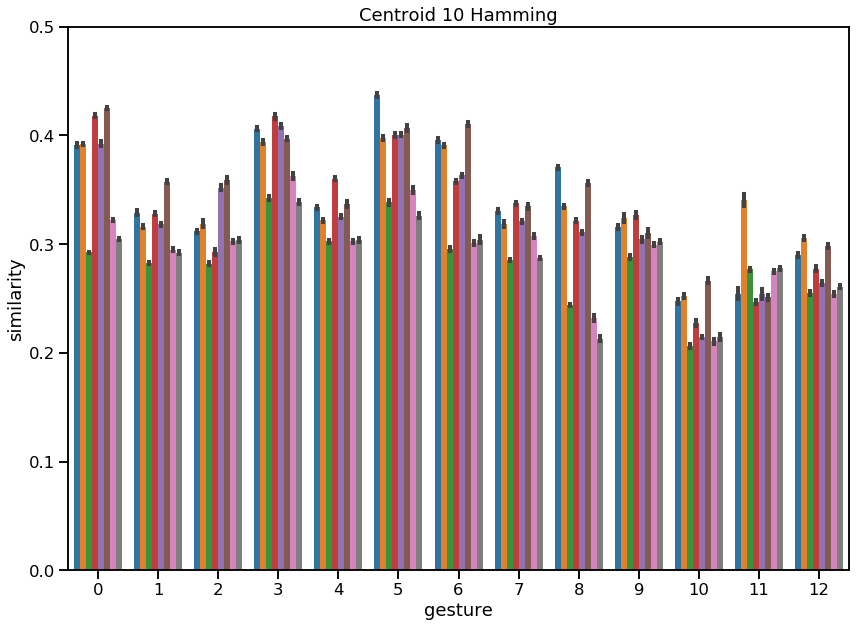

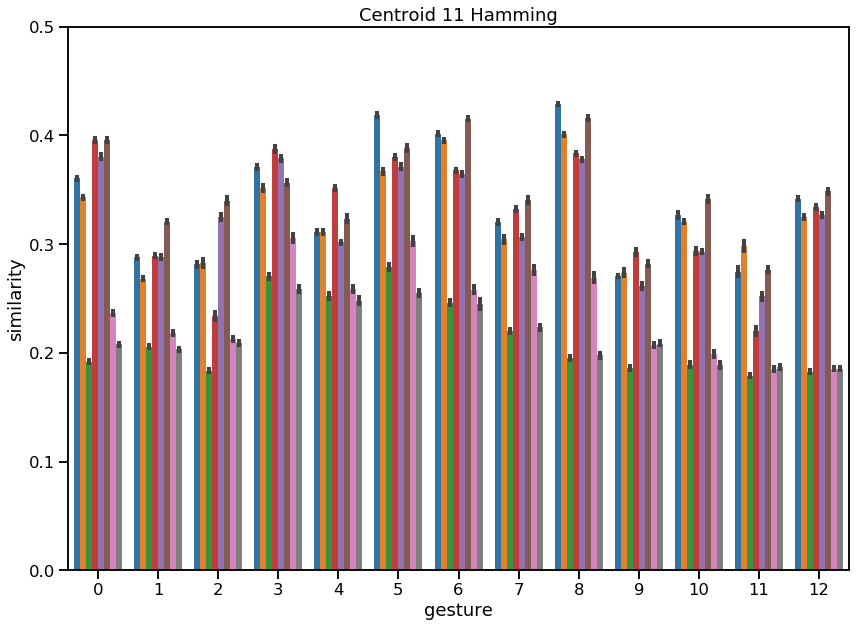

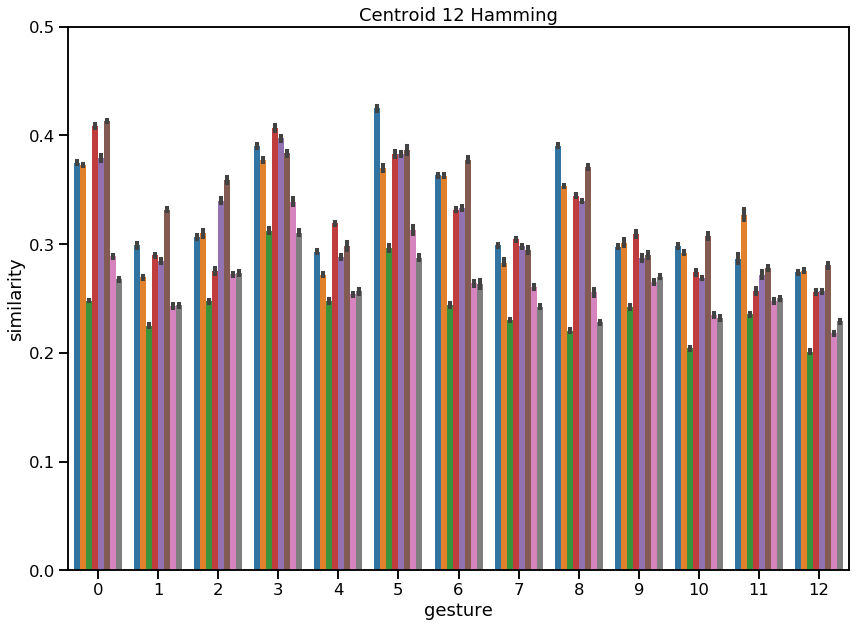

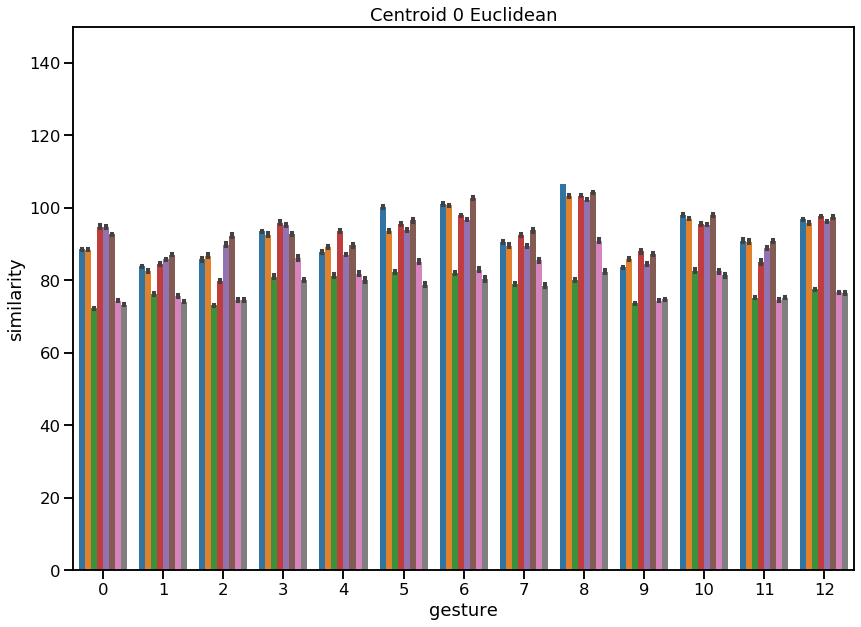

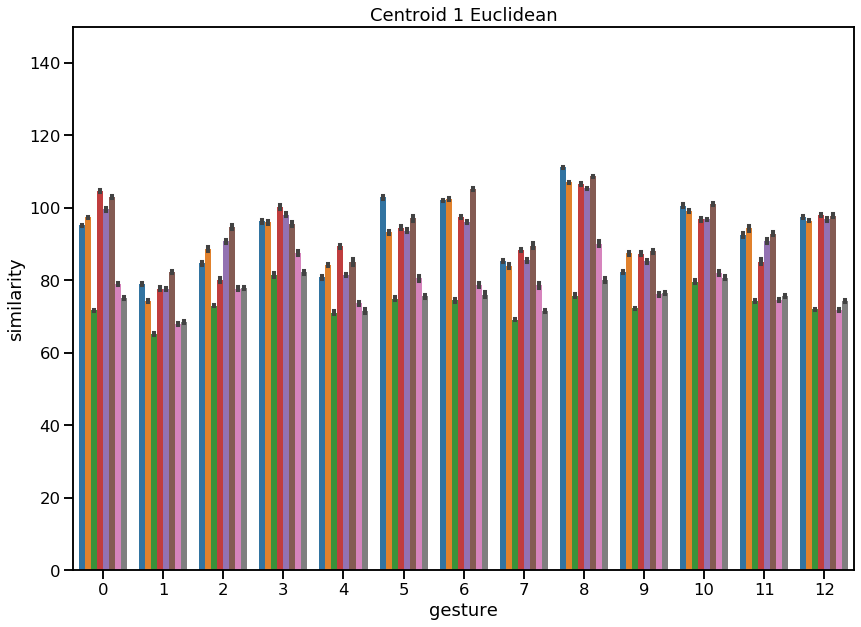

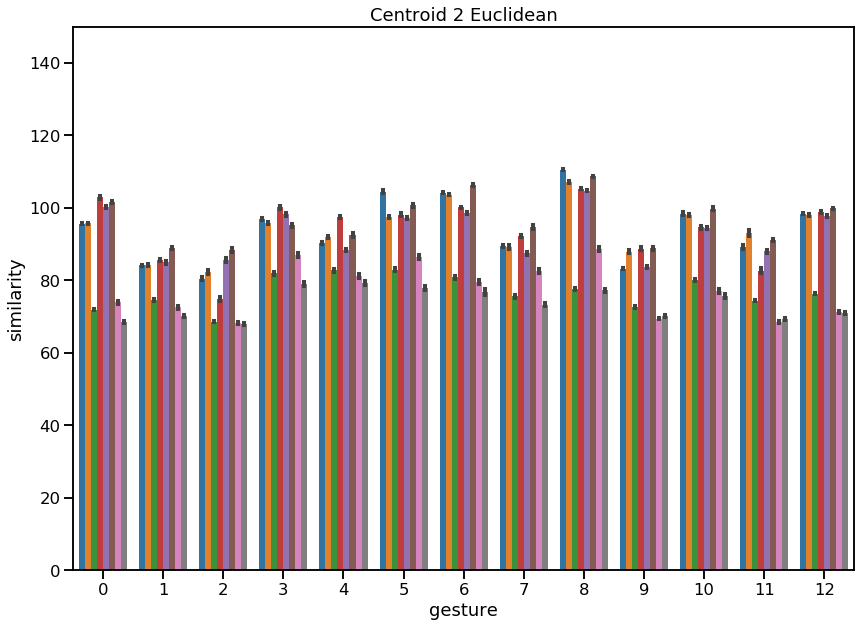

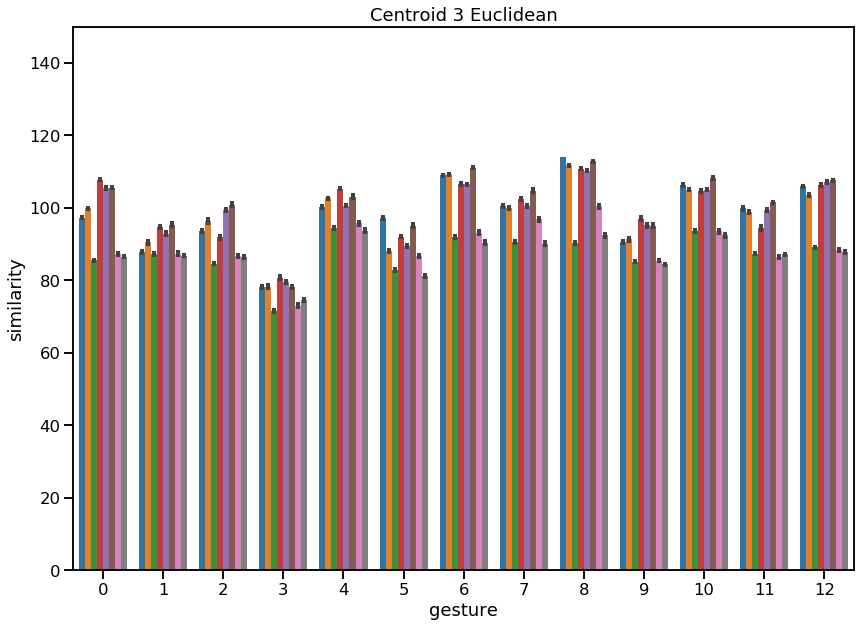

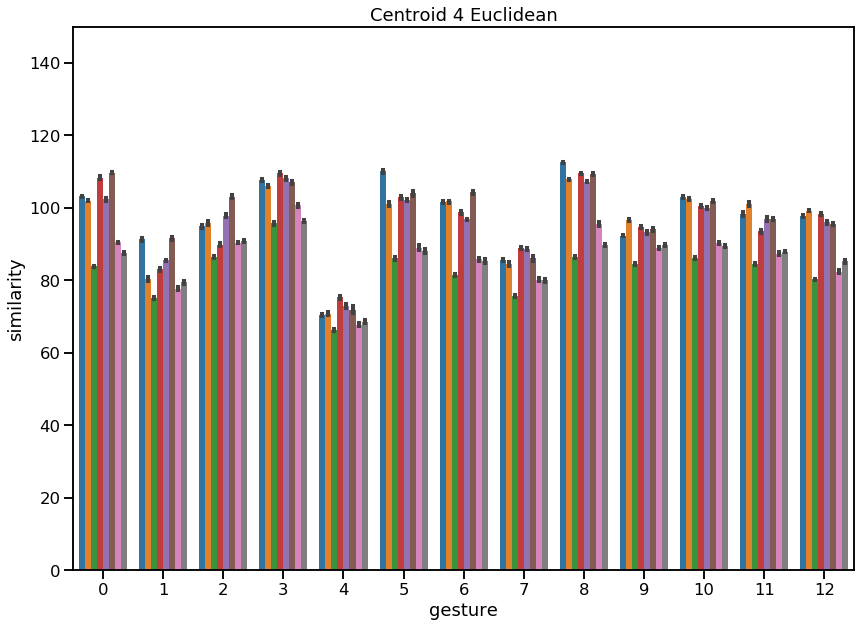

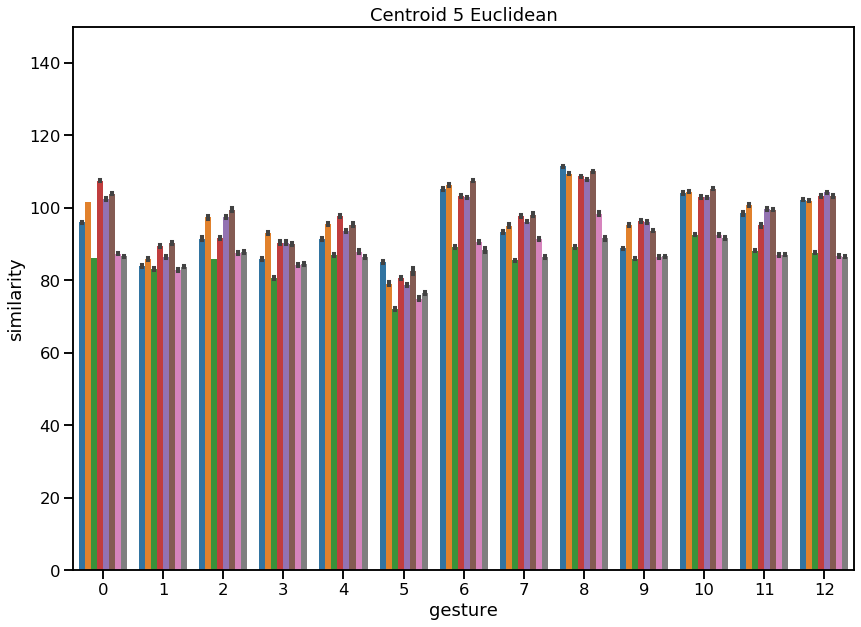

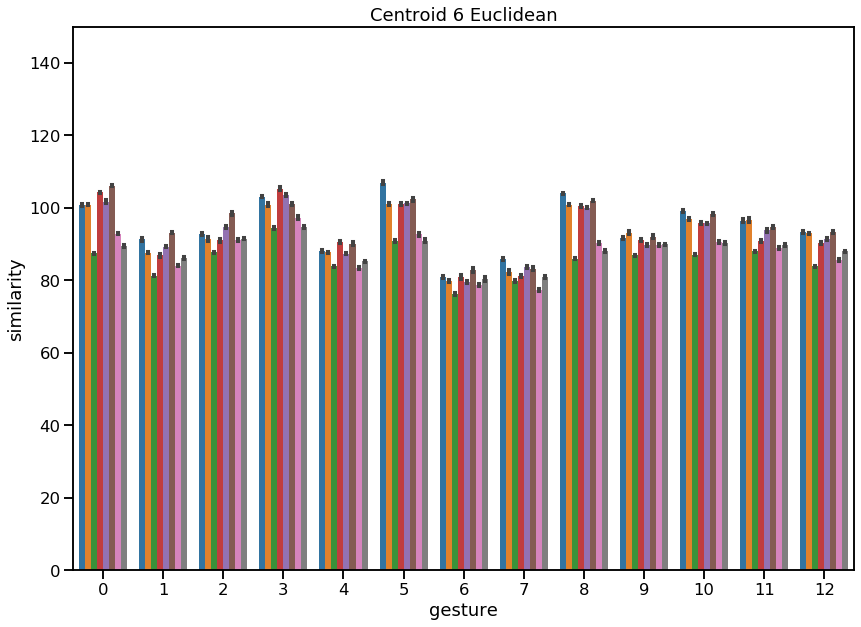

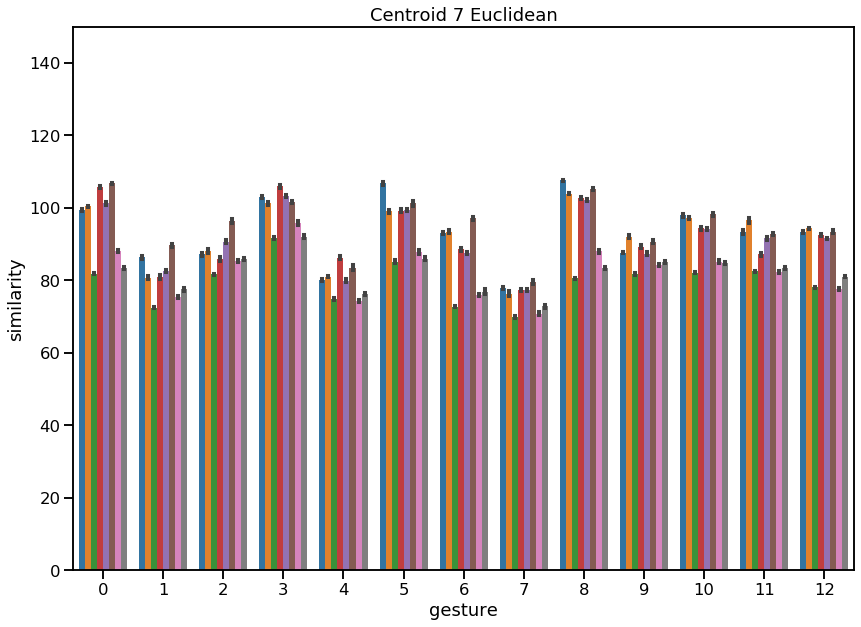

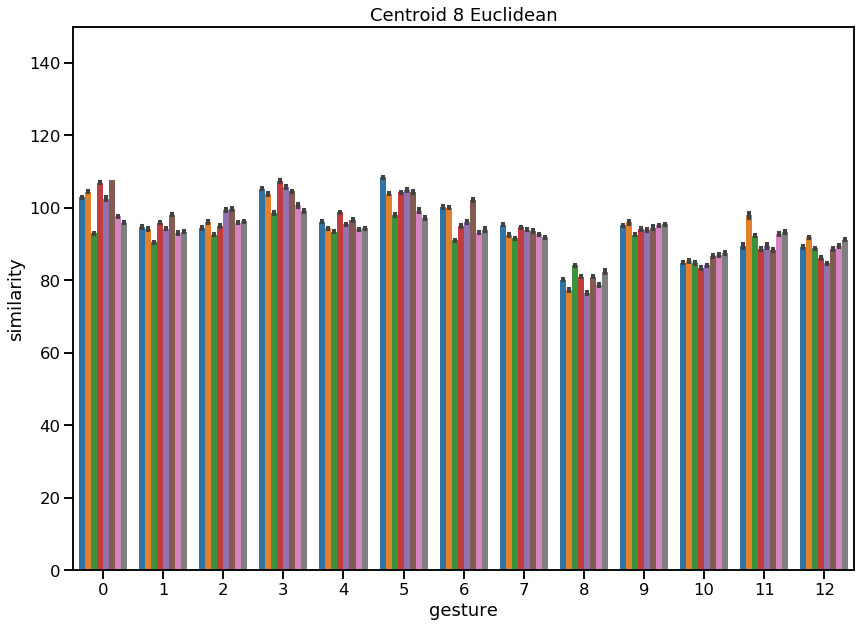

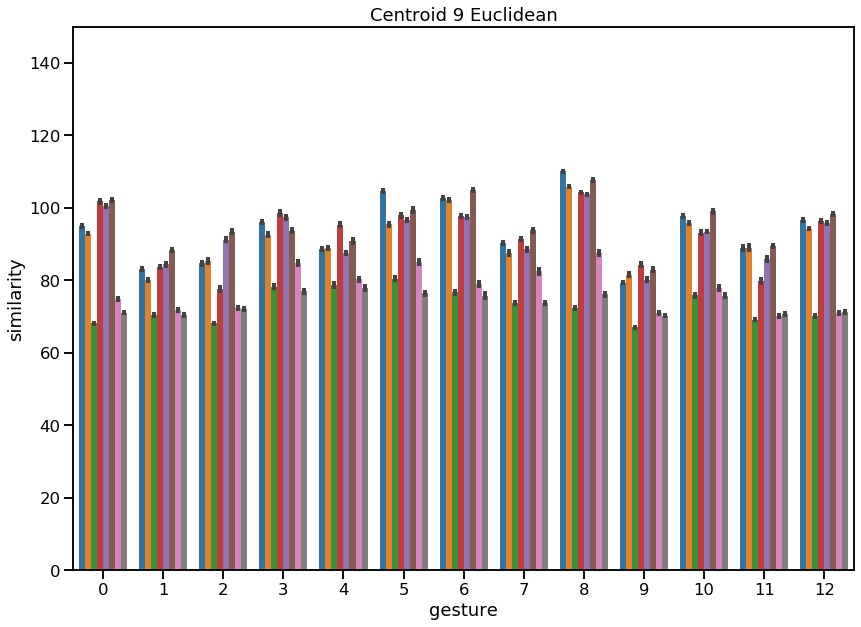

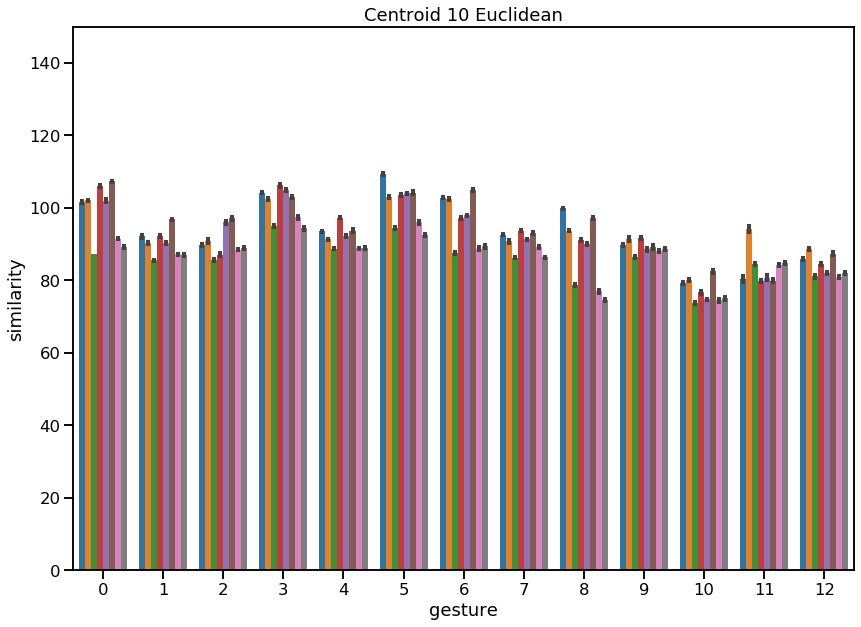

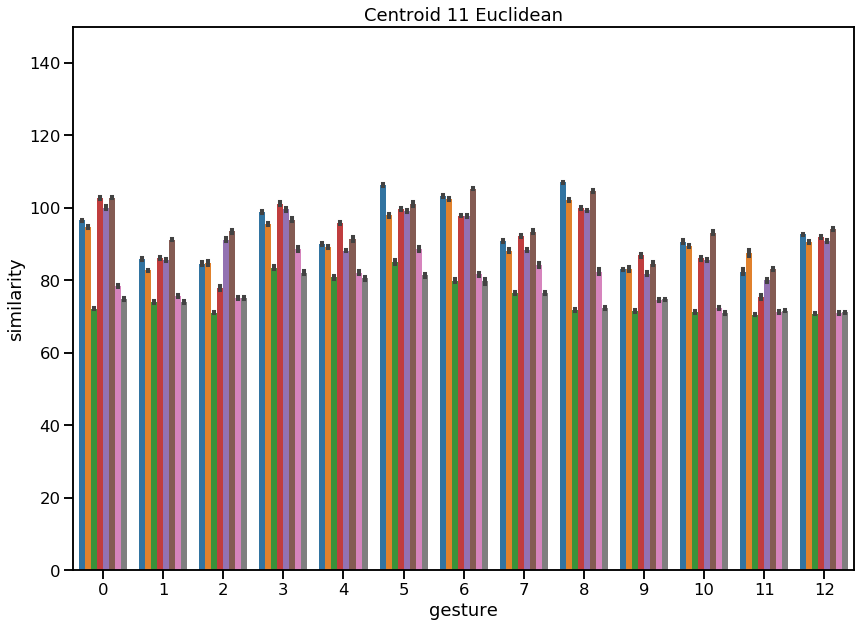

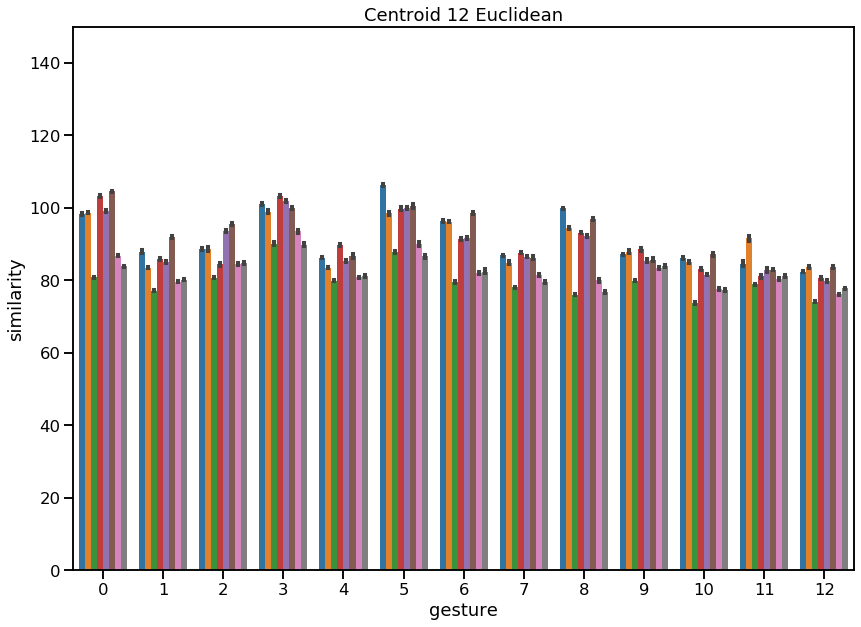

In [305]:
k = 'singleCentroid'
cent = res[k]['bipolarizedCentroids']
centLab = res[k]['labels'].flatten()
d = cdist(cent,hv,'hamming')

df = pd.DataFrame(d.flatten(),columns=['similarity'])

df['gesture'] = np.tile(gestLabel,(len(centLab),1)).flatten()
df['position'] = np.tile(posLabel,(len(centLab),1)).flatten()
df['centroidType'] = np.tile(np.arange(len(centLab)) % max(np.unique(centLab,return_counts=True)[1]),(len(hv),1)).T.flatten()
df['centroidLabel'] = np.tile(centLab,(len(hv),1)).T.flatten()

for g in gestures:
    f,ax = plt.subplots(figsize=(14,10))
    sns.barplot(x='gesture',y='similarity',hue='position',data=df.loc[(df['centroidLabel']==g) & (df['centroidType']==0)],ax=ax)
    ax.set(ylim=(0,0.5),title='Centroid %d Hamming' % (g))
    ax.legend_.remove()
    plt.show()

#     f,ax = plt.subplots(figsize=(20,10))
#     sns.barplot(x='centroidLabel',y='similarity',hue='centroidType',data=df.loc[(df['gesture']==0) & (df['position'] == 0)],ax=ax)
#     ax.set(ylim=(0,0.5))
#     plt.show()

cent = res[k]['centroids']
d = cdist(cent,hv,'euclidean')

df = pd.DataFrame(d.flatten(),columns=['similarity'])

df['gesture'] = np.tile(gestLabel,(len(centLab),1)).flatten()
df['position'] = np.tile(posLabel,(len(centLab),1)).flatten()
df['centroidType'] = np.tile(np.arange(len(centLab)) % max(np.unique(centLab,return_counts=True)[1]),(len(hv),1)).T.flatten()
df['centroidLabel'] = np.tile(centLab,(len(hv),1)).T.flatten()

for g in gestures:
    f,ax = plt.subplots(figsize=(14,10))
    sns.barplot(x='gesture',y='similarity',hue='position',data=df.loc[(df['centroidLabel']==g) & (df['centroidType']==0)],ax=ax)
    ax.set(ylim=(0,150),title='Centroid %d Euclidean' % (g))
    ax.legend_.remove()
    plt.show()
    
#     f,ax = plt.subplots(figsize=(20,10))
#     sns.barplot(x='centroidLabel',y='similarity',hue='centroidType',data=df.loc[(df['gesture']==0) & (df['position'] == 0)],ax=ax)
#     ax.set(ylim=(0,0.5))
#     plt.show()

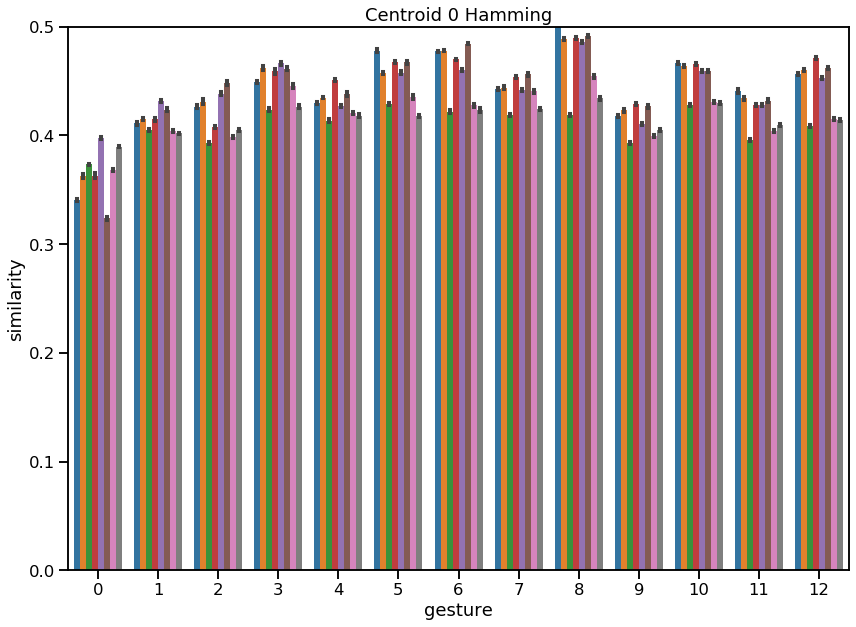

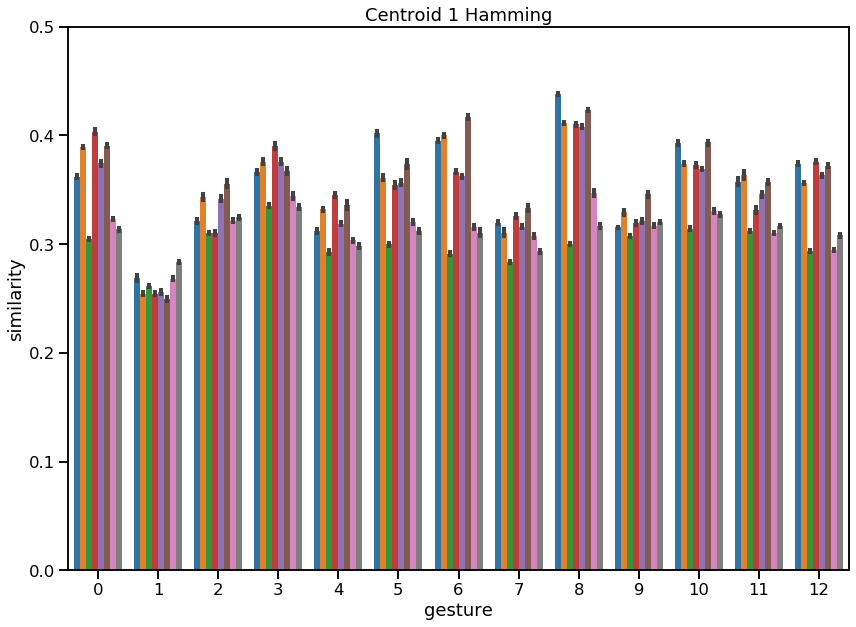

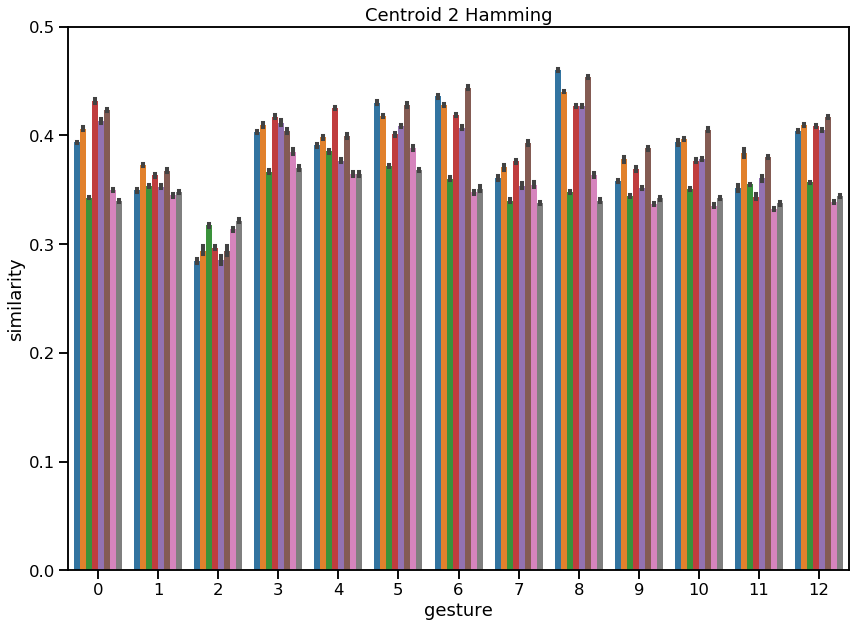

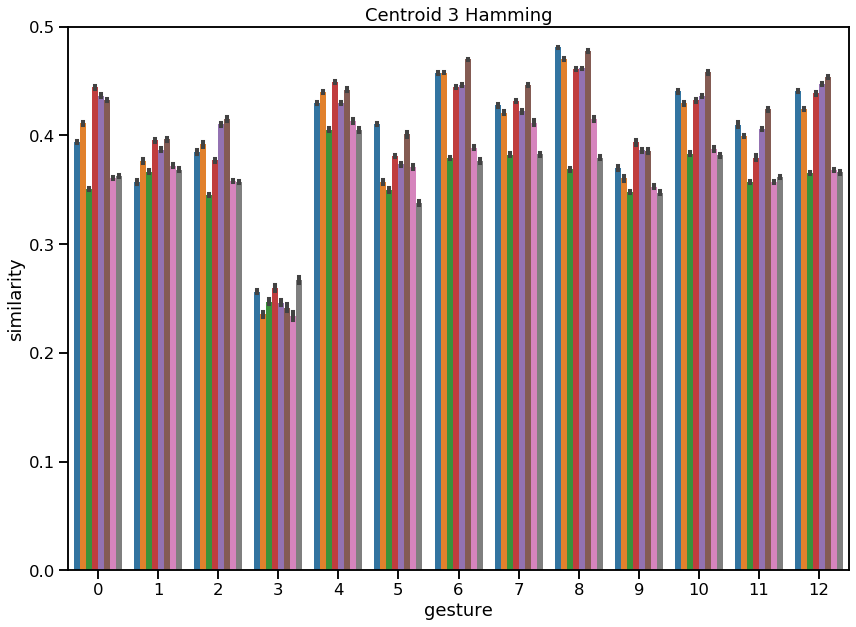

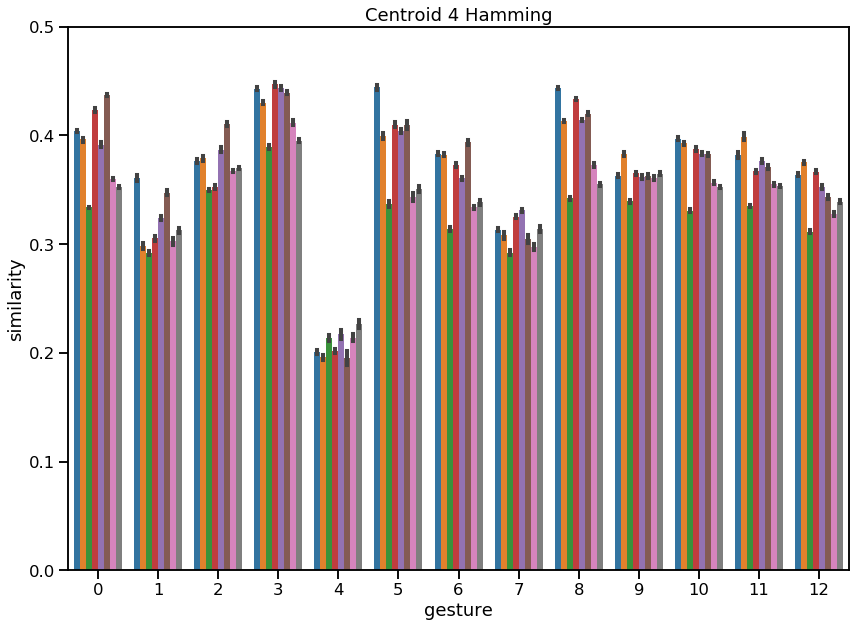

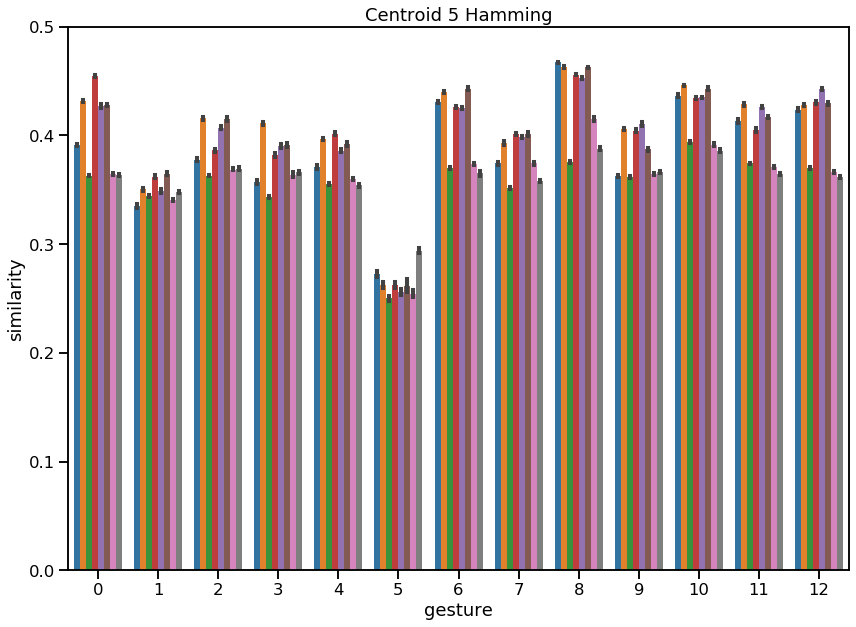

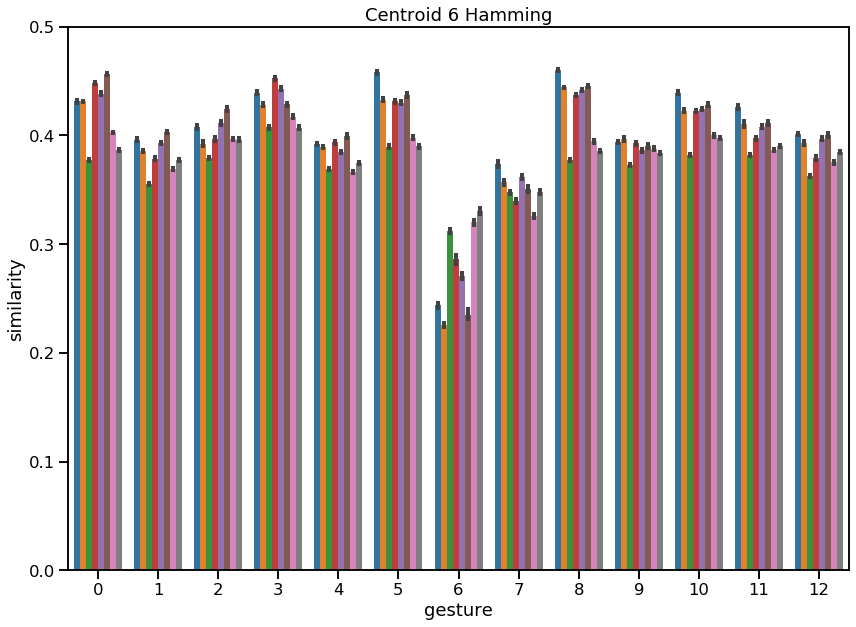

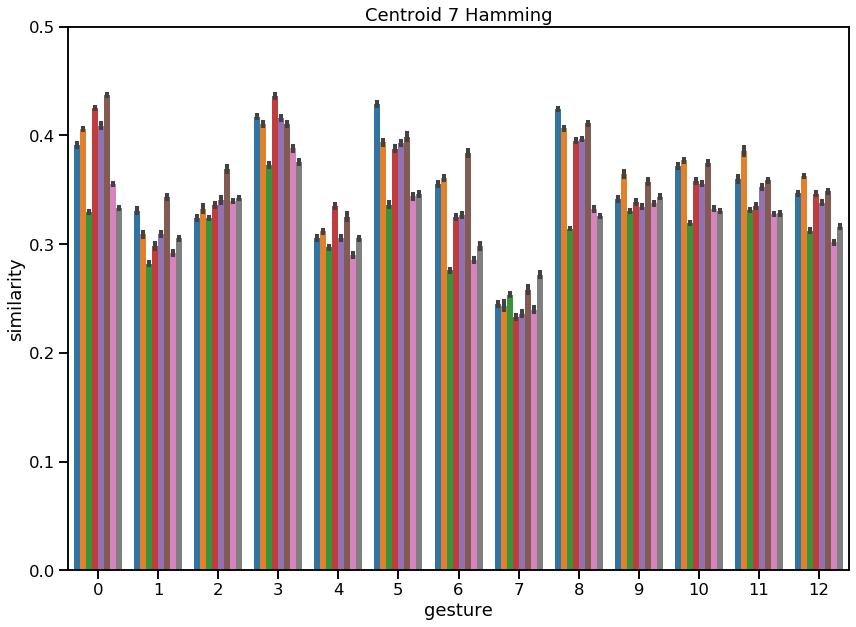

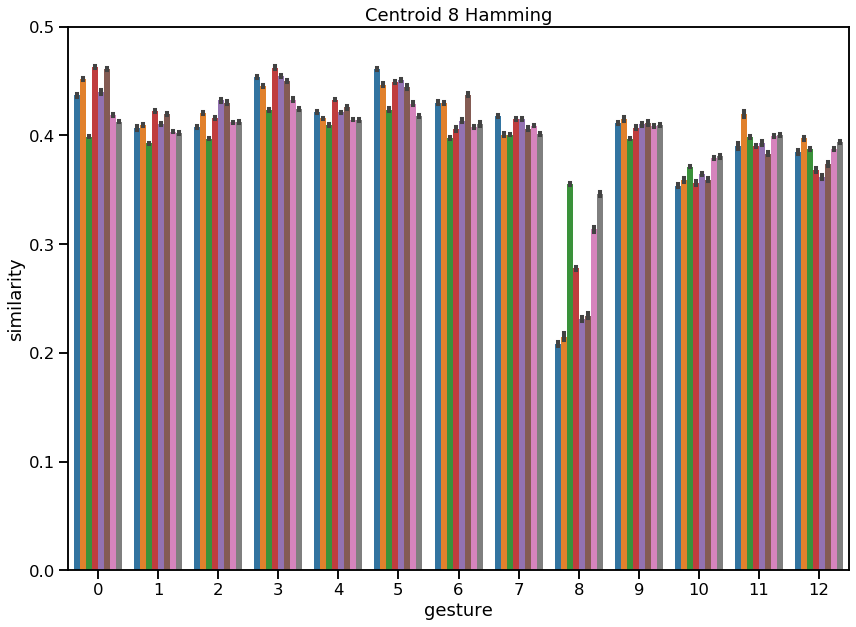

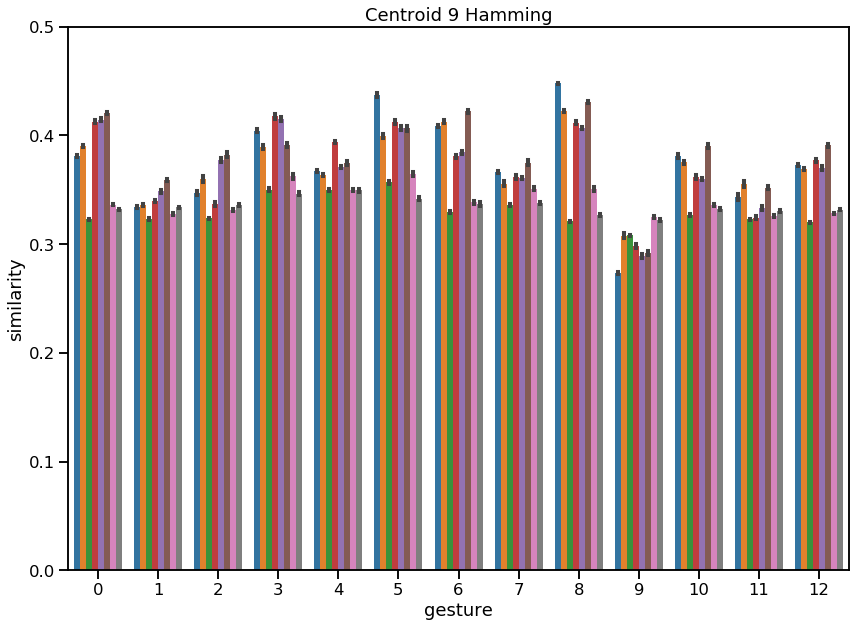

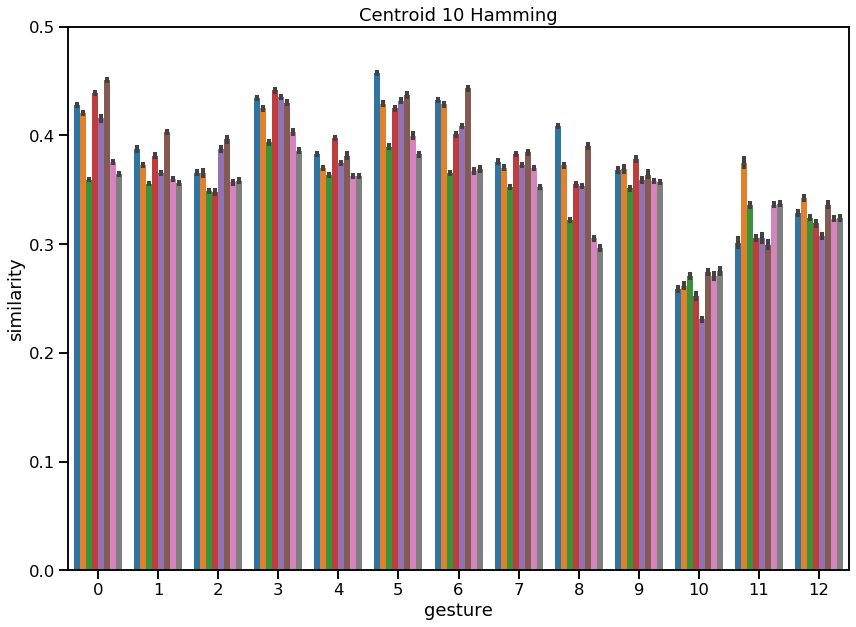

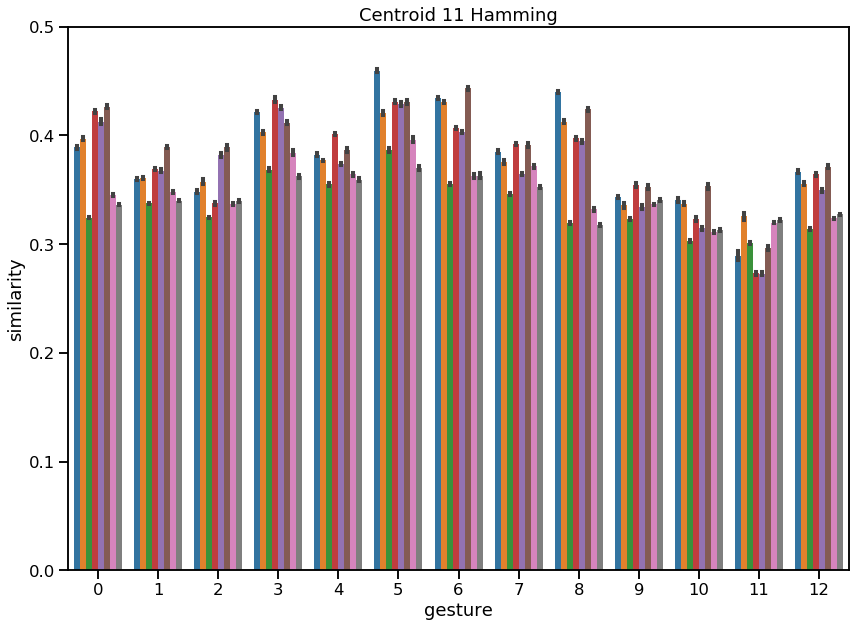

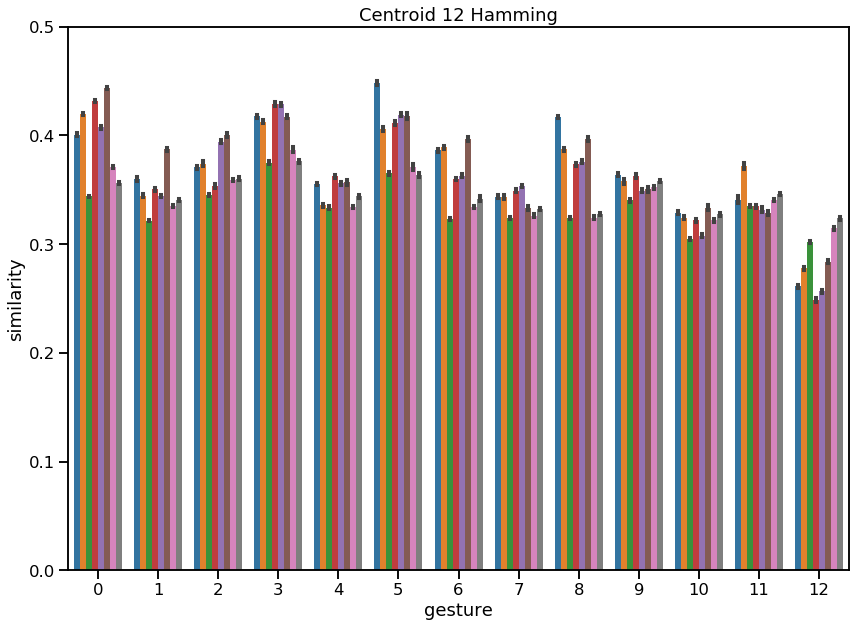

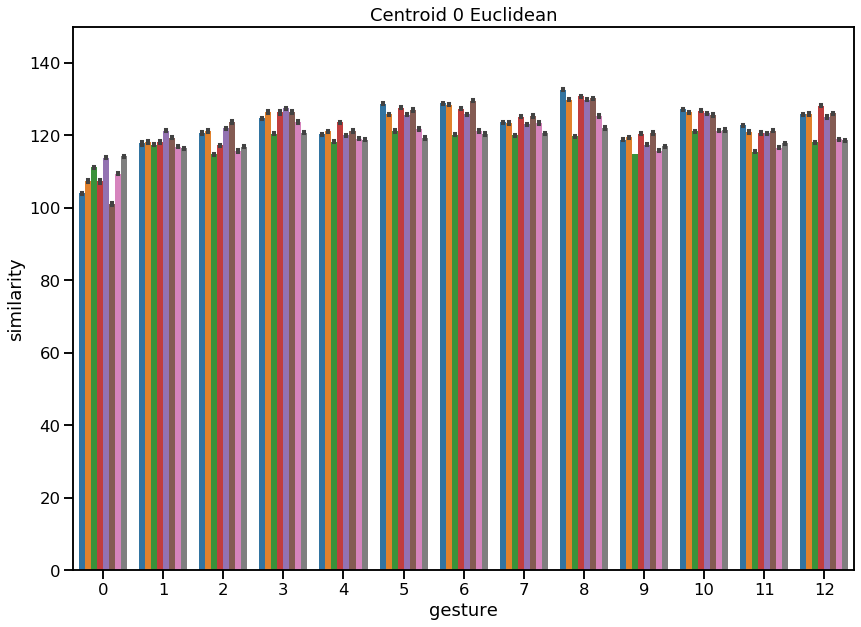

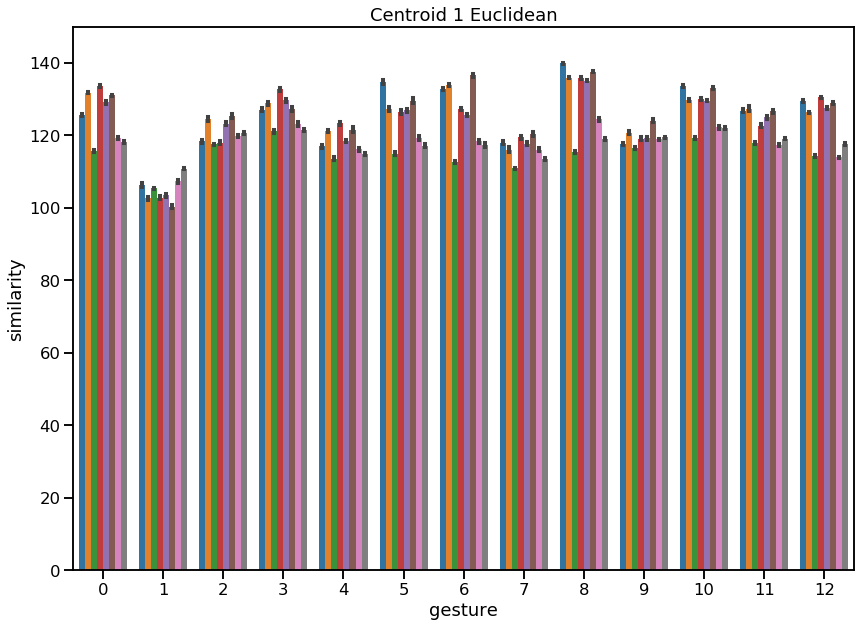

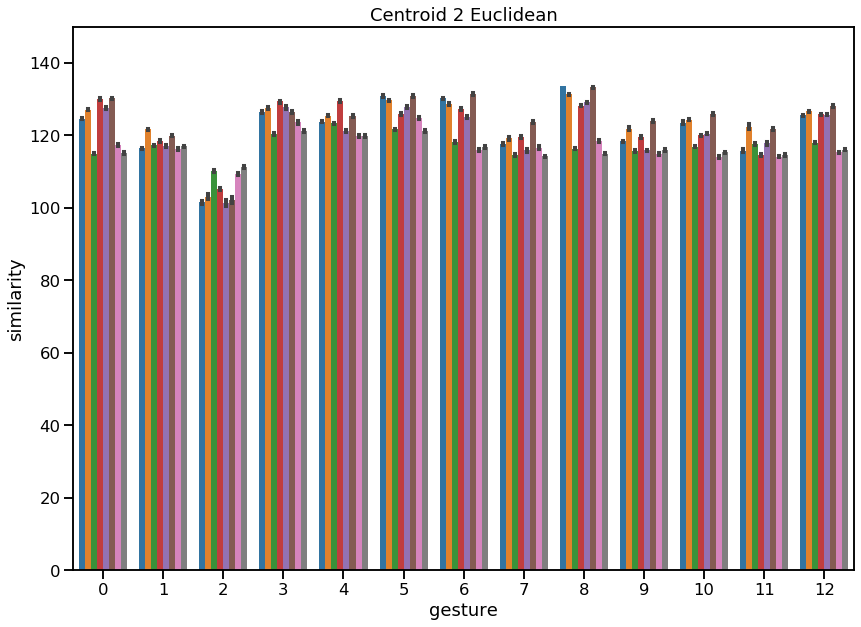

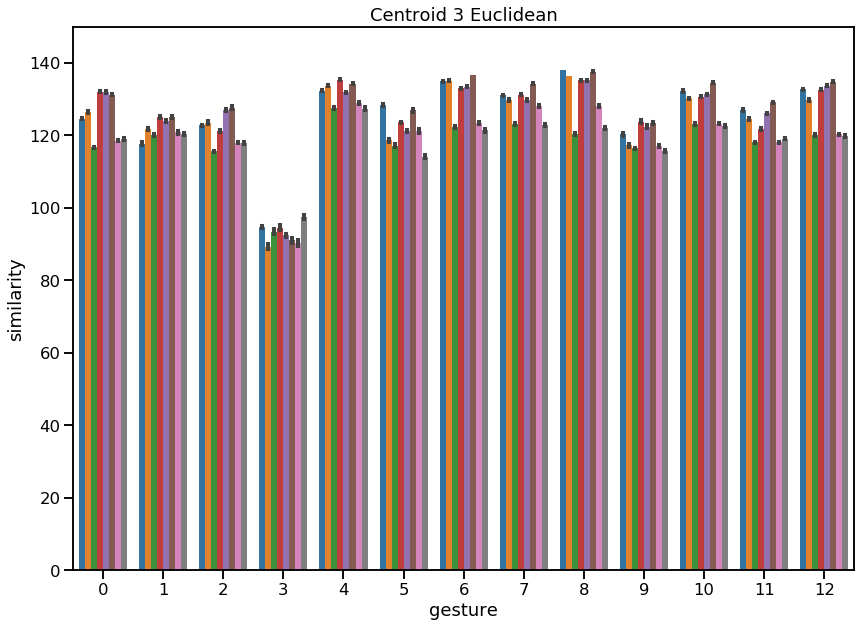

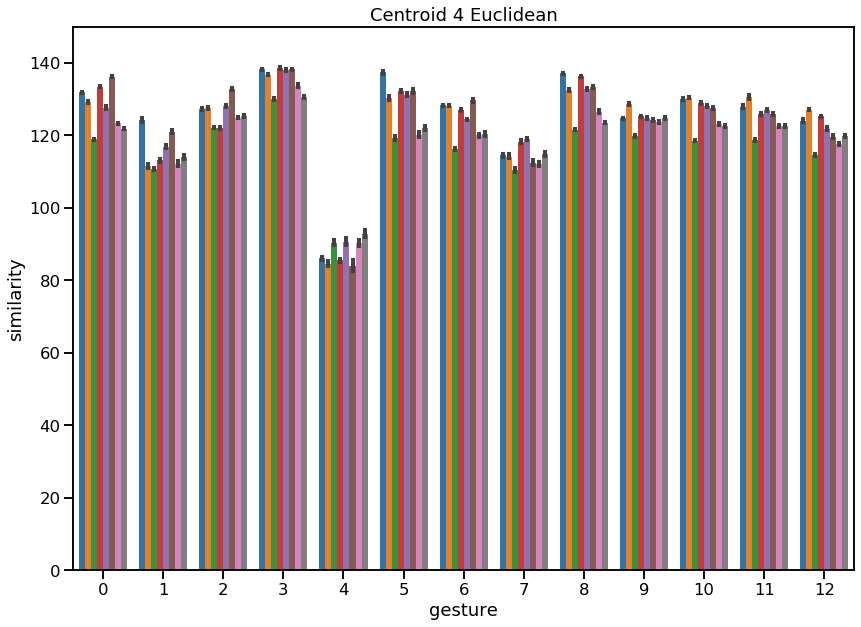

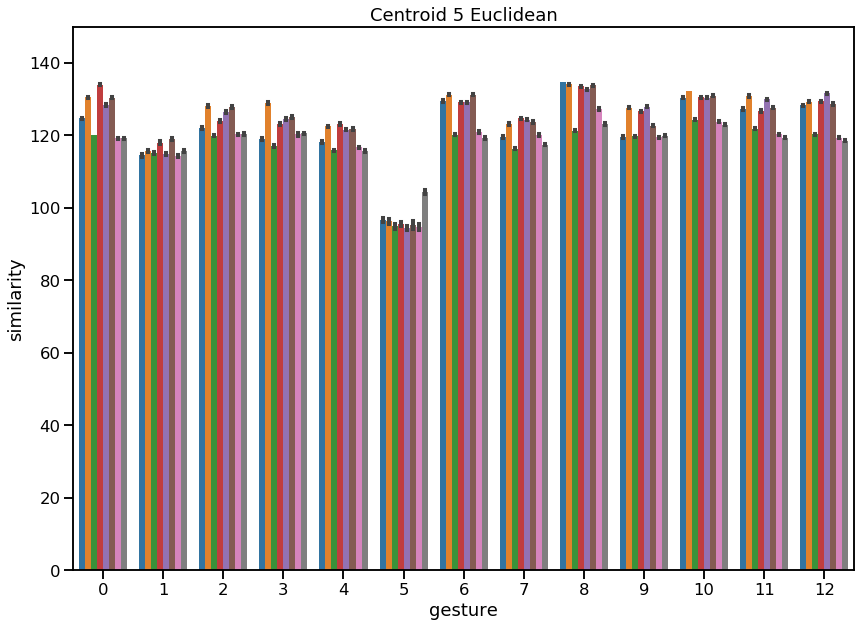

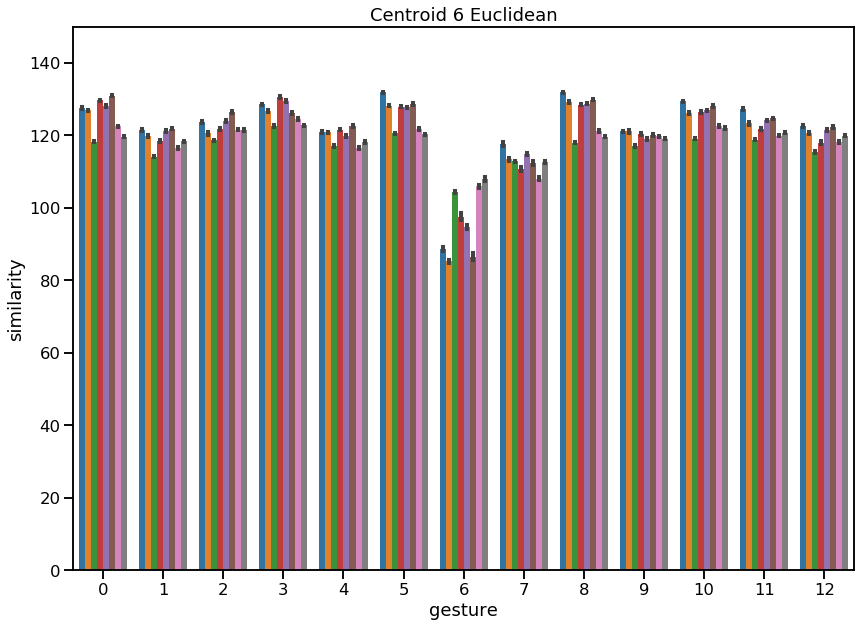

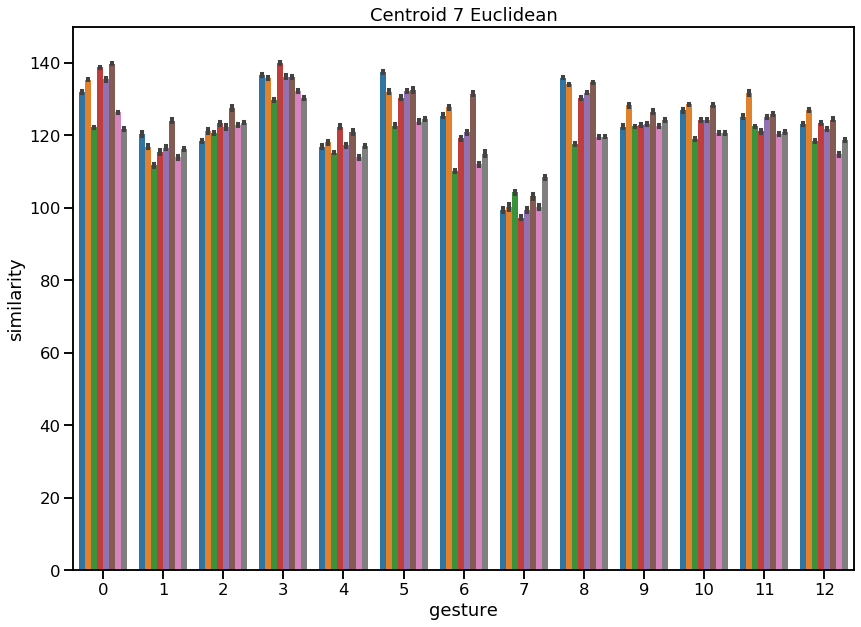

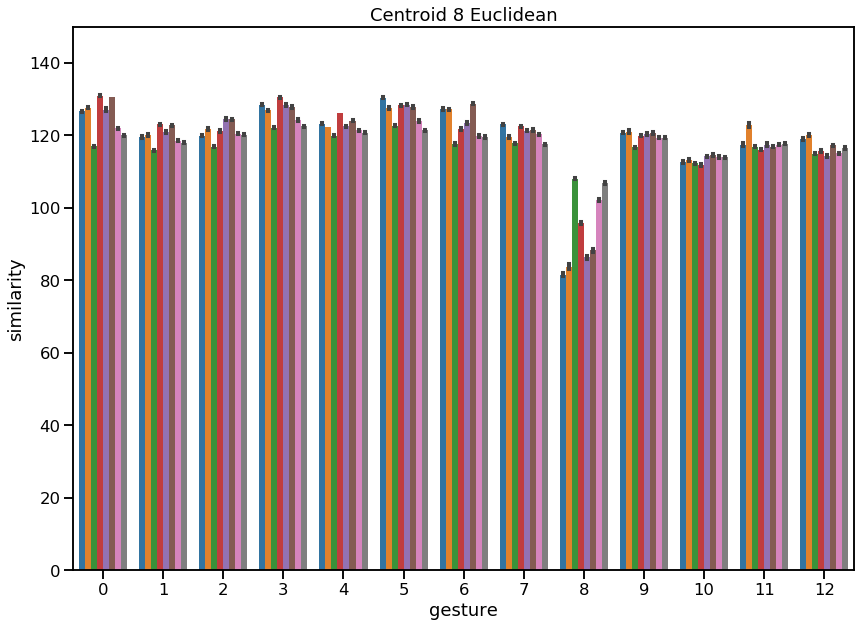

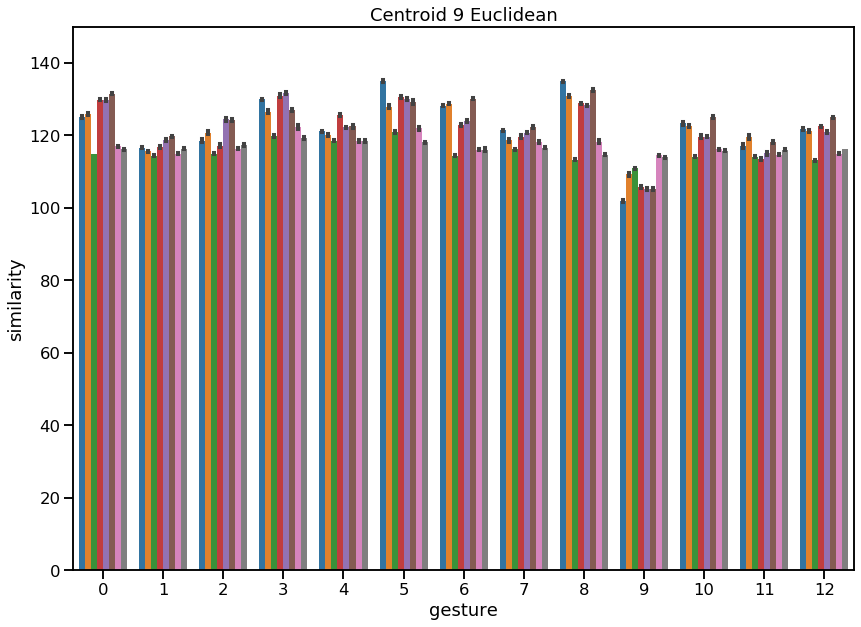

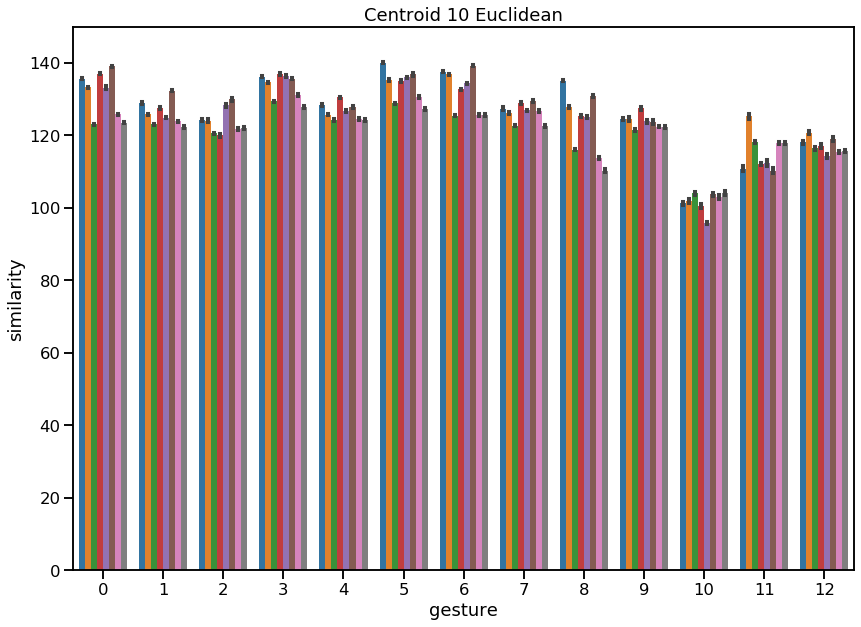

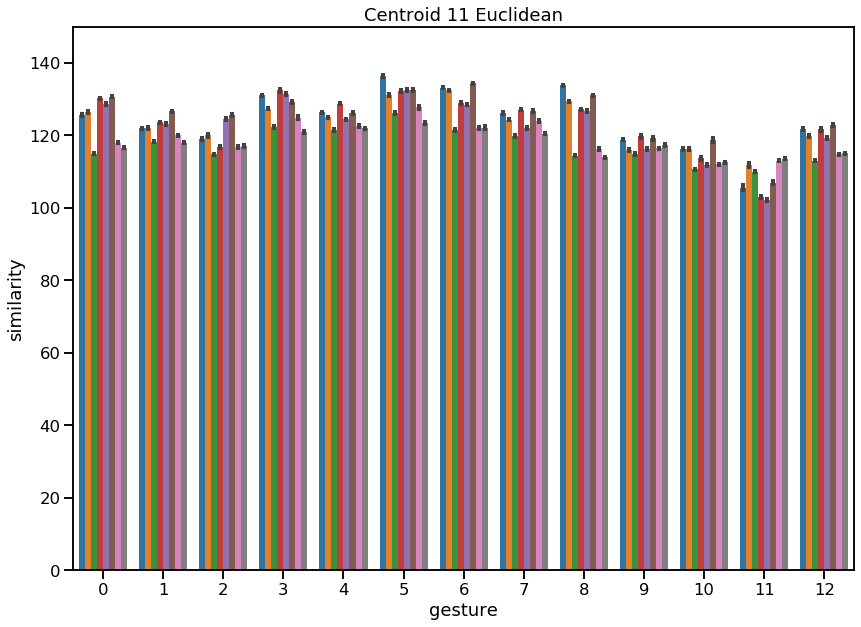

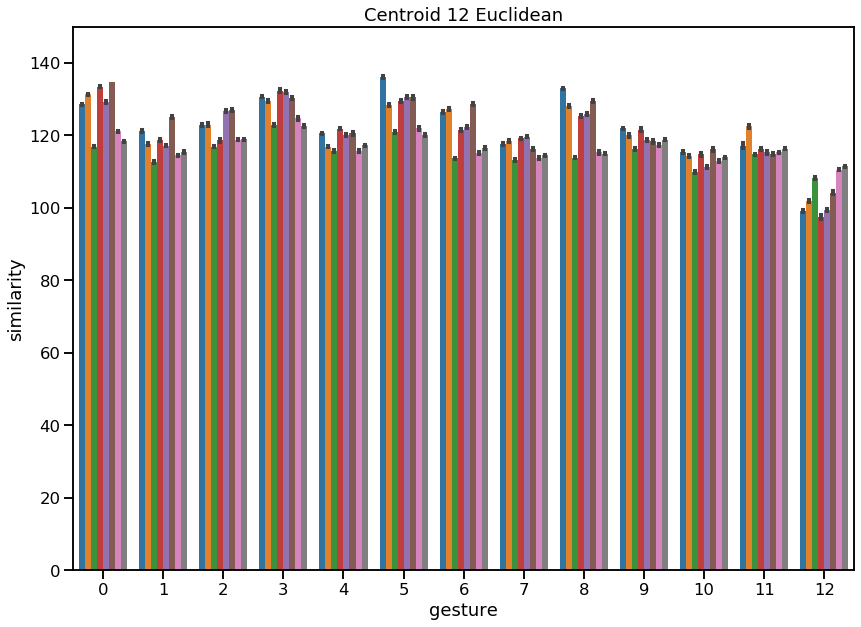

In [306]:
k = 'singleLVQCentroid'
cent = res[k]['bipolarizedCentroids']
centLab = res[k]['labels'].flatten()
d = cdist(cent,hv,'hamming')

df = pd.DataFrame(d.flatten(),columns=['similarity'])

df['gesture'] = np.tile(gestLabel,(len(centLab),1)).flatten()
df['position'] = np.tile(posLabel,(len(centLab),1)).flatten()
df['centroidType'] = np.tile(np.arange(len(centLab)) % max(np.unique(centLab,return_counts=True)[1]),(len(hv),1)).T.flatten()
df['centroidLabel'] = np.tile(centLab,(len(hv),1)).T.flatten()

for g in gestures:
    f,ax = plt.subplots(figsize=(14,10))
    sns.barplot(x='gesture',y='similarity',hue='position',data=df.loc[(df['centroidLabel']==g) & (df['centroidType']==0)],ax=ax)
    ax.set(ylim=(0,0.5),title='Centroid %d Hamming' % (g))
    ax.legend_.remove()
    plt.show()

#     f,ax = plt.subplots(figsize=(20,10))
#     sns.barplot(x='centroidLabel',y='similarity',hue='centroidType',data=df.loc[(df['gesture']==0) & (df['position'] == 0)],ax=ax)
#     ax.set(ylim=(0,0.5))
#     plt.show()

cent = res[k]['centroids']
d = cdist(cent,hv,'euclidean')

df = pd.DataFrame(d.flatten(),columns=['similarity'])

df['gesture'] = np.tile(gestLabel,(len(centLab),1)).flatten()
df['position'] = np.tile(posLabel,(len(centLab),1)).flatten()
df['centroidType'] = np.tile(np.arange(len(centLab)) % max(np.unique(centLab,return_counts=True)[1]),(len(hv),1)).T.flatten()
df['centroidLabel'] = np.tile(centLab,(len(hv),1)).T.flatten()

for g in gestures:
    f,ax = plt.subplots(figsize=(14,10))
    sns.barplot(x='gesture',y='similarity',hue='position',data=df.loc[(df['centroidLabel']==g) & (df['centroidType']==0)],ax=ax)
    ax.set(ylim=(0,150),title='Centroid %d Euclidean' % (g))
    ax.legend_.remove()
    plt.show()
    
#     f,ax = plt.subplots(figsize=(20,10))
#     sns.barplot(x='centroidLabel',y='similarity',hue='centroidType',data=df.loc[(df['gesture']==0) & (df['position'] == 0)],ax=ax)
#     ax.set(ylim=(0,0.5))
#     plt.show()

In [447]:
cent = res['singleCentroid']['bipolarizedCentroids']
multiCent = res['multiCentroid']['bipolarizedCentroids']
multLab = res['multiCentroid']['labels'].flatten()
optCent = res['singleLVQCentroid']['bipolarizedCentroids']

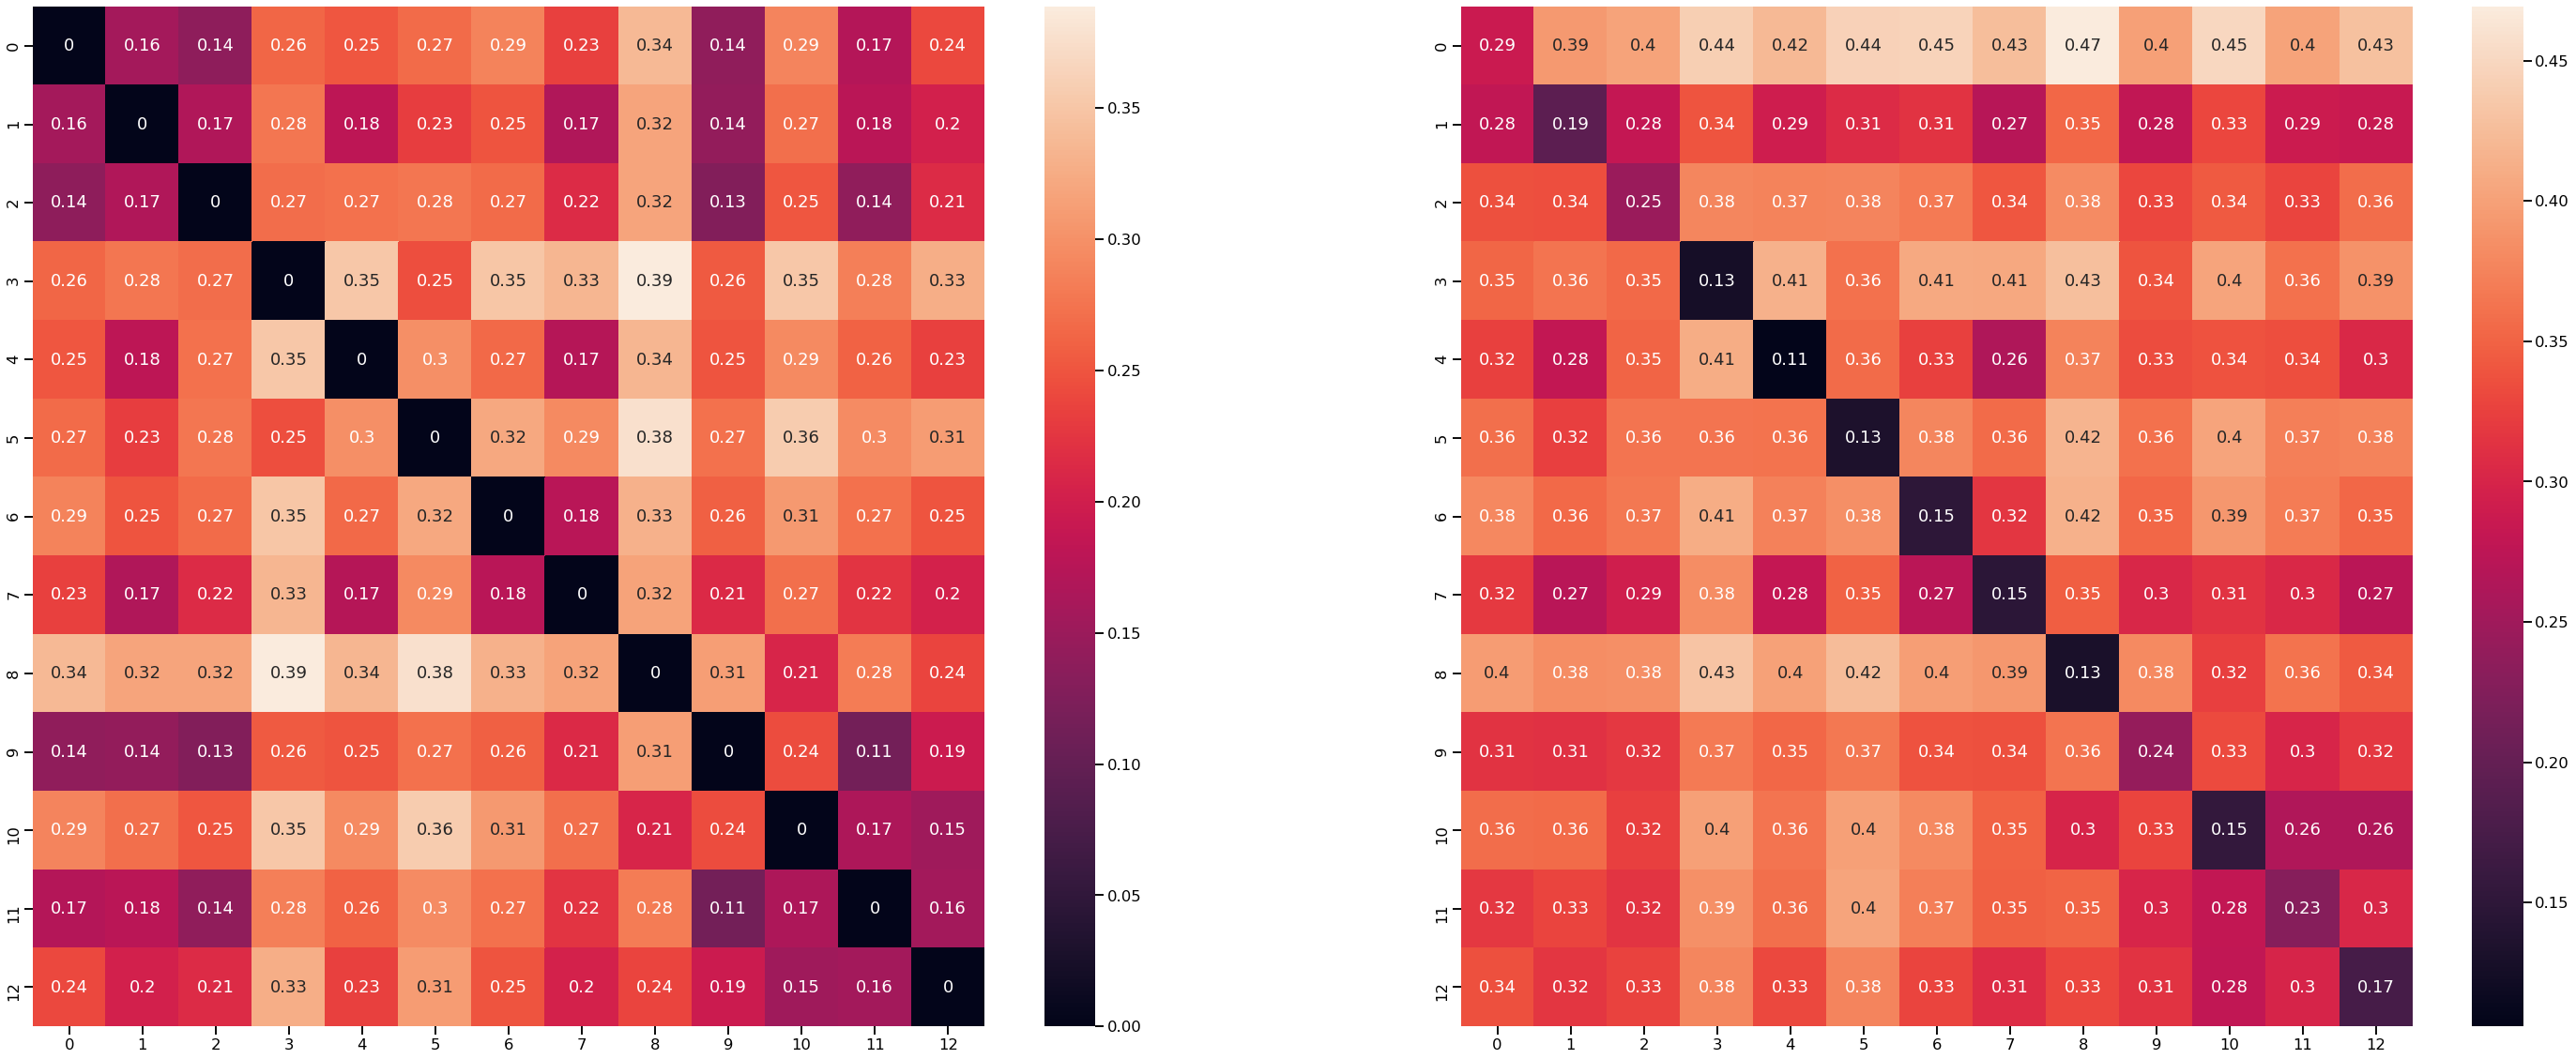

In [437]:
f,ax = plt.subplots(1,2,figsize=(50,20))
sns.heatmap(cdist(cent,cent,'hamming'),annot=True,ax=ax[0])
sns.heatmap(cdist(optCent,cent,'hamming'),annot=True,ax=ax[1])
plt.show()

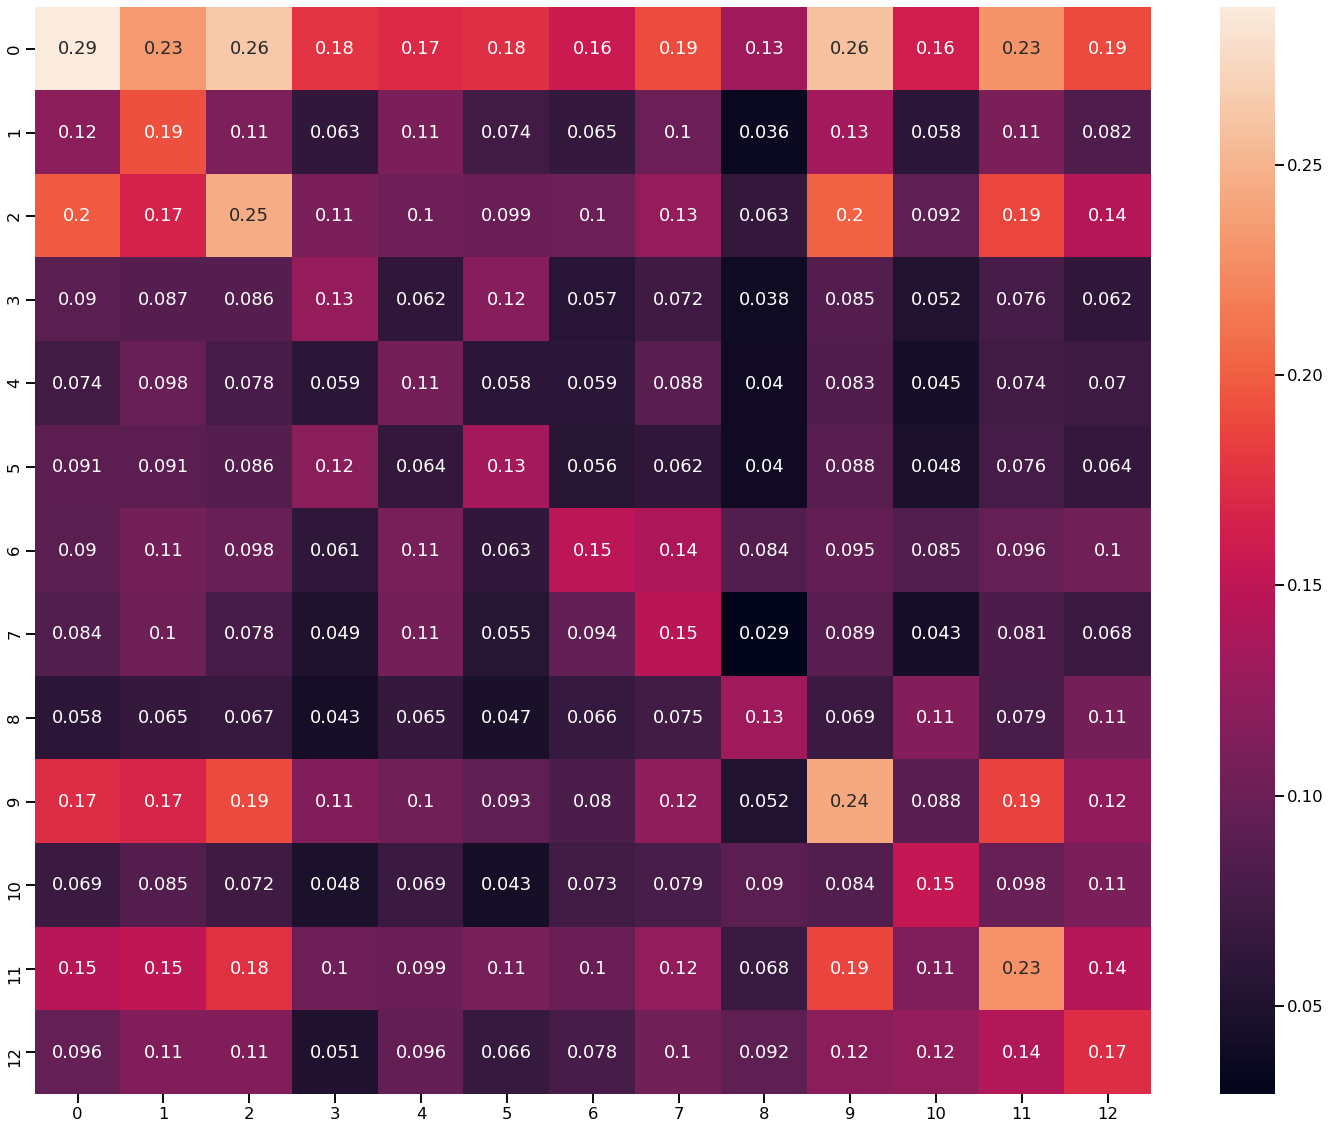

In [438]:
f,ax = plt.subplots(figsize=(25,20))
sns.heatmap(cdist(optCent,cent,'hamming') - cdist(cent,cent,'hamming'),annot=True,ax=ax)
plt.show()

In [ ]:
for g in gestures:
    

In [567]:
commonIdx = np.where(abs(np.sum(cent,axis=0)) == 13)[0]
print('%d common elements across all centroid prototypes' % len(commonIdx))
commonOptIdx = np.where(abs(np.sum(optCent,axis=0)) == 13)[0]
print('%d common elements across all optimized prototypes' % len(commonOptIdx))
for gOpt in gestures:
    for g in gestures:
        if g == gOpt:
            diffIdx = np.where(cent[g] != optCent[gOpt])[0]
            nCommon = len(np.intersect1d(diffIdx,commonIdx))
            print('Optimized gesture %d prototype has %d changed elements from centroid, %0.2f%% of which (%d) are part of elements common to all centroids' % (g,len(diffIdx),nCommon/len(diffIdx)*100,nCommon))
            commonOther = np.where(abs(np.sum(cent[[x for x in gestures if x != gOpt]],axis=0)) == 12)[0]
            print(len(commonOther))
        else:
            diffOrig = np.where(cent[g] != cent[gOpt])[0]
            diffOpt = np.where(optCent[g] != optCent[gOpt])[0]
            if len(diffOrig) > len(diffOpt):
                print('Distance between gesture %d and %d centroids reduced from %d bits to %d bits' % (gOpt,g,len(diffOrig),len(diffOpt)))
            else:
                print('Distance between gesture %d and %d centroids increased from %d bits to %d bits' % (gOpt,g,len(diffOrig),len(diffOpt)))
            

3030 common elements across all centroid prototypes
682 common elements across all optimized prototypes
Optimized gesture 0 prototype has 2875 changed elements from centroid, 34.50% of which (992) are part of elements common to all centroids
3088
Distance between gesture 0 and 1 centroids increased from 1594 bits to 4125 bits
Distance between gesture 0 and 2 centroids increased from 1384 bits to 4696 bits
Distance between gesture 0 and 3 centroids increased from 2629 bits to 4704 bits
Distance between gesture 0 and 4 centroids increased from 2513 bits to 4402 bits
Distance between gesture 0 and 5 centroids increased from 2686 bits to 4659 bits
Distance between gesture 0 and 6 centroids increased from 2883 bits to 4755 bits
Distance between gesture 0 and 7 centroids increased from 2349 bits to 4506 bits
Distance between gesture 0 and 8 centroids increased from 3382 bits to 4876 bits
Distance between gesture 0 and 9 centroids increased from 1403 bits to 4451 bits
Distance between gesture

In [568]:
d = cdist(cent, multiCent,'hamming')*10000
dNew = cdist(optCent, multiCent,'hamming')*10000

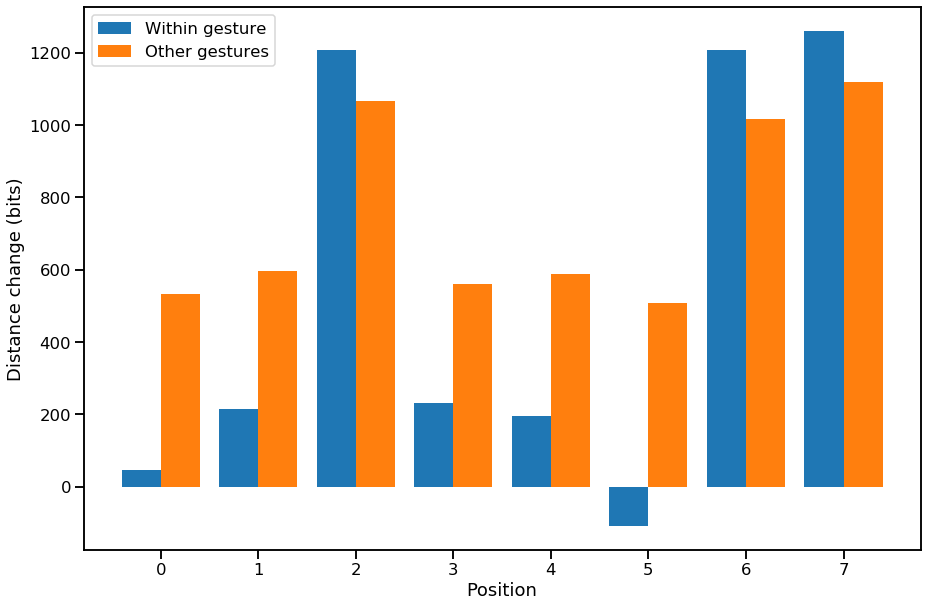

In [606]:
inDiff = []
outDiff = []
for g in gestures:
    inDiff.append(dNew[g][multLab==g] - d[g][multLab==g])
    outDiff.append(np.mean(dNew[g][multLab != g].reshape(-1,8),axis=0) - np.mean(d[g][multLab != g].reshape(-1,8),axis=0))
inDiff = np.mean(np.vstack(inDiff),axis=0)
outDiff = np.mean(np.vstack(outDiff),axis=0)
f,ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(numPositions)-0.2,inDiff,width=0.4)
ax.bar(np.arange(numPositions)+0.2,outDiff,width=0.4)
ax.legend(['Within gesture','Other gestures'],loc='upper left')
ax.set(xlabel='Position',ylabel='Distance change (bits)')
plt.show()

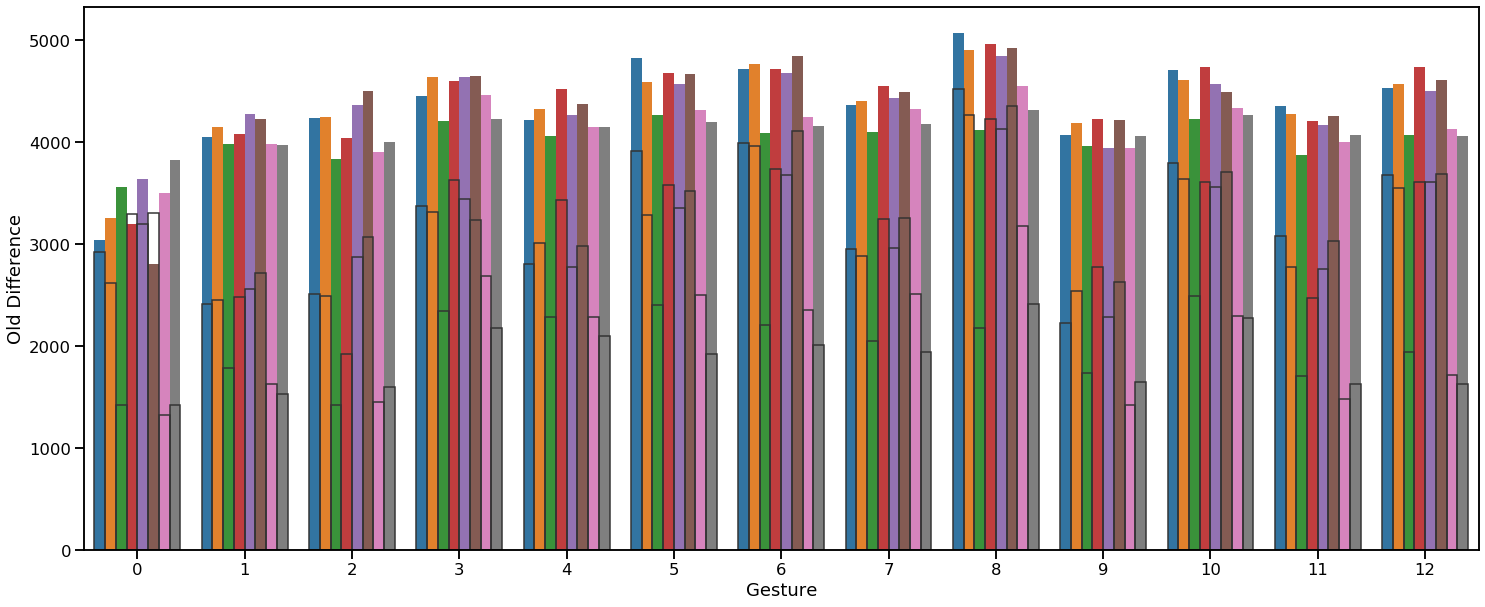

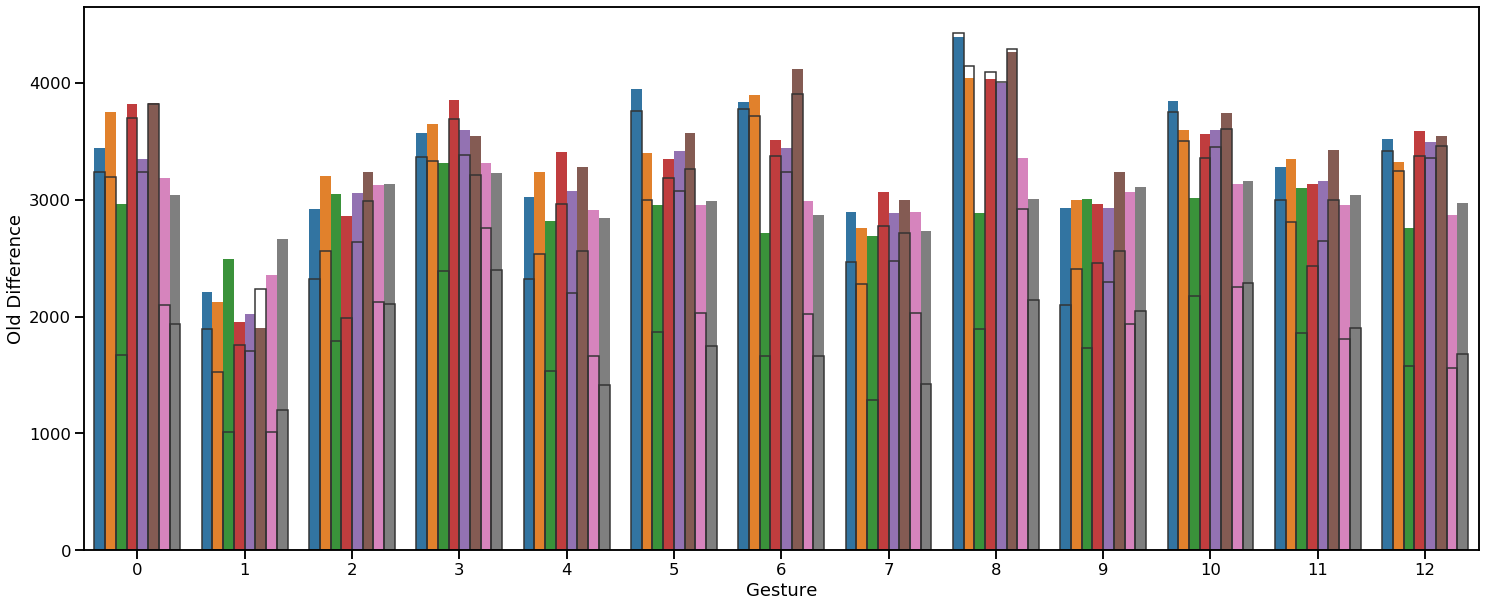

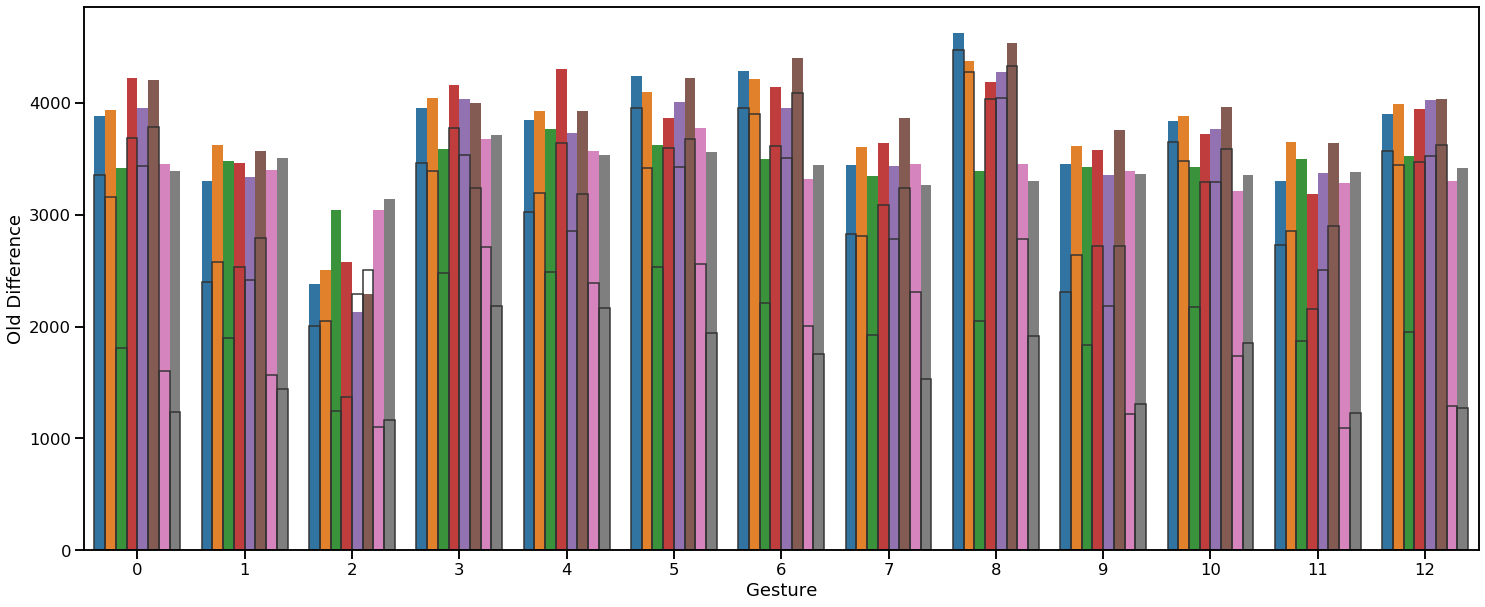

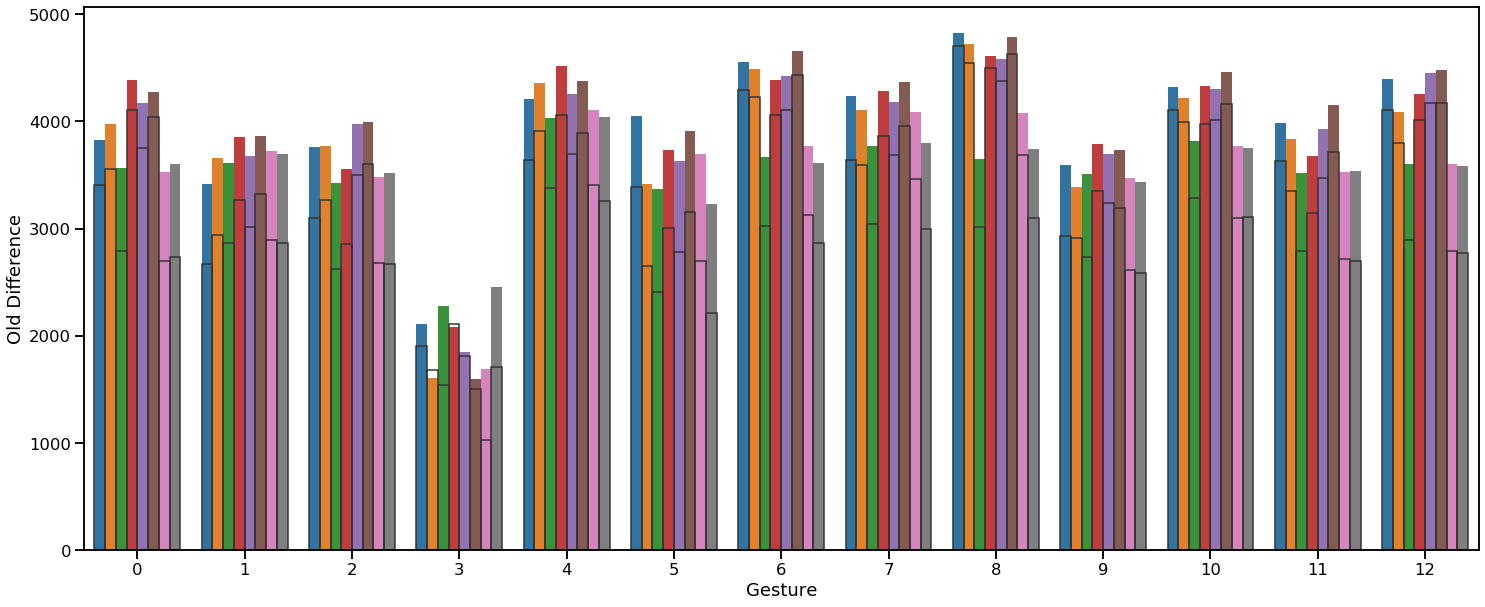

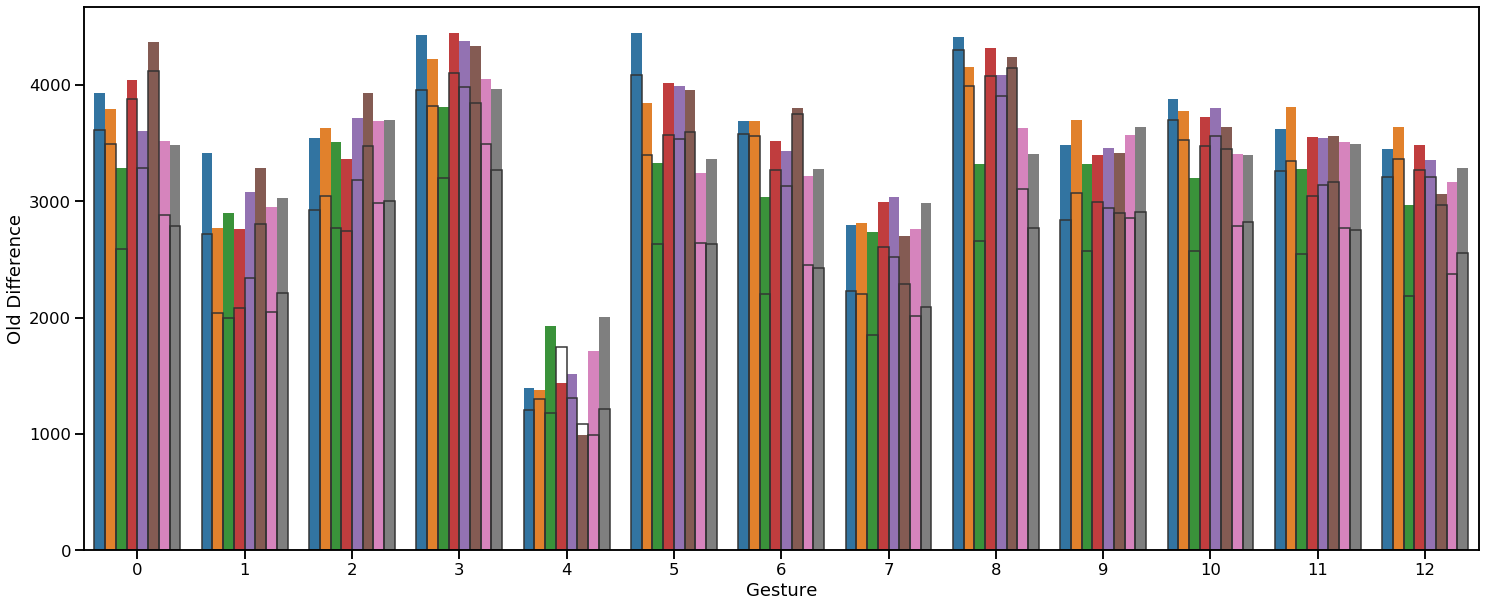

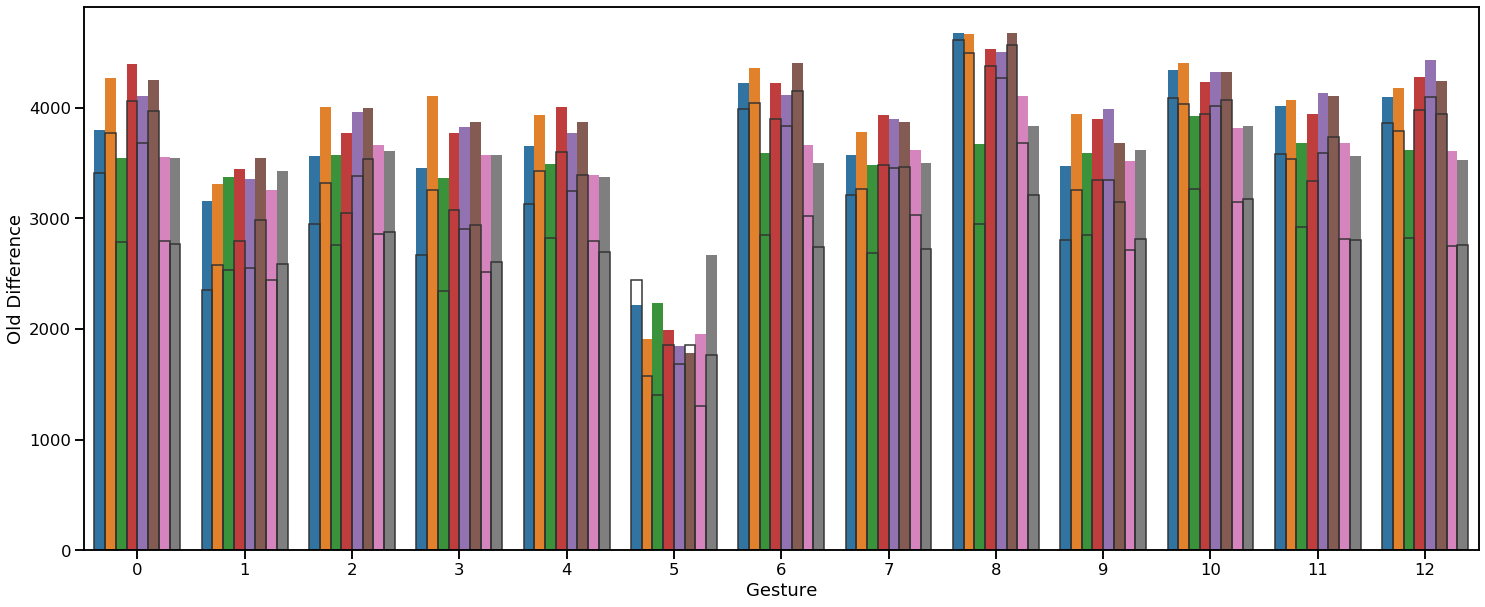

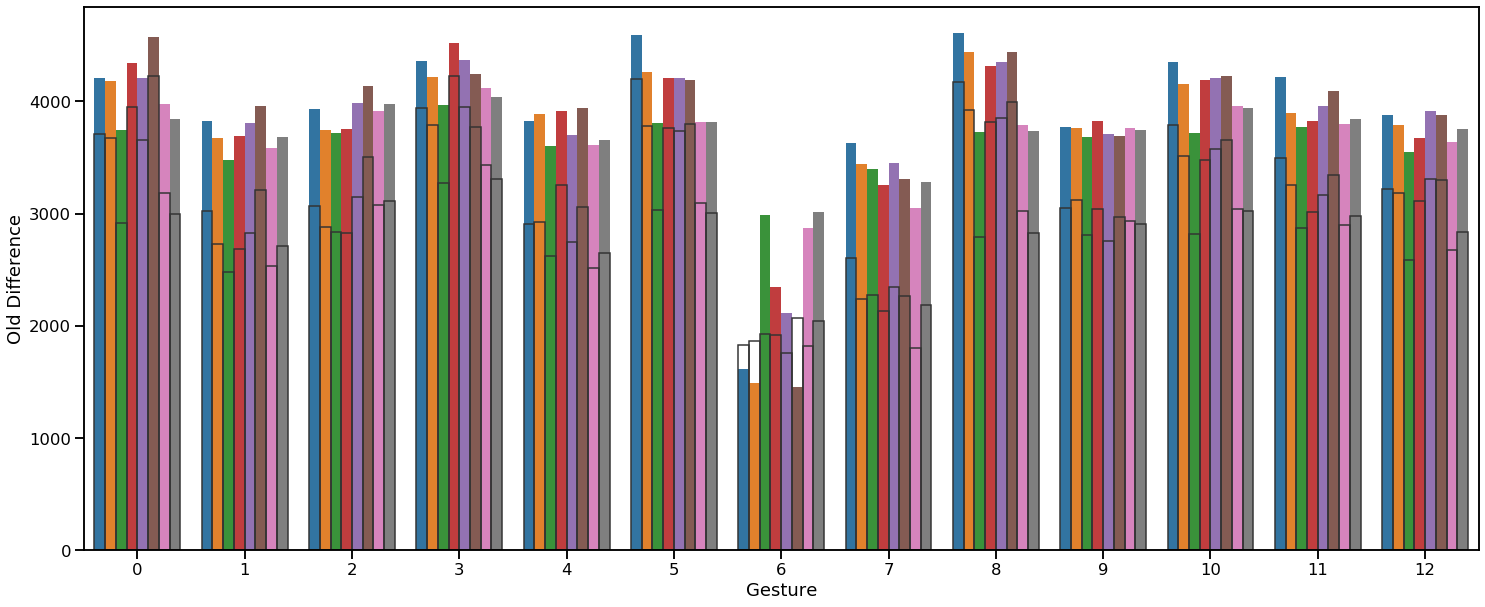

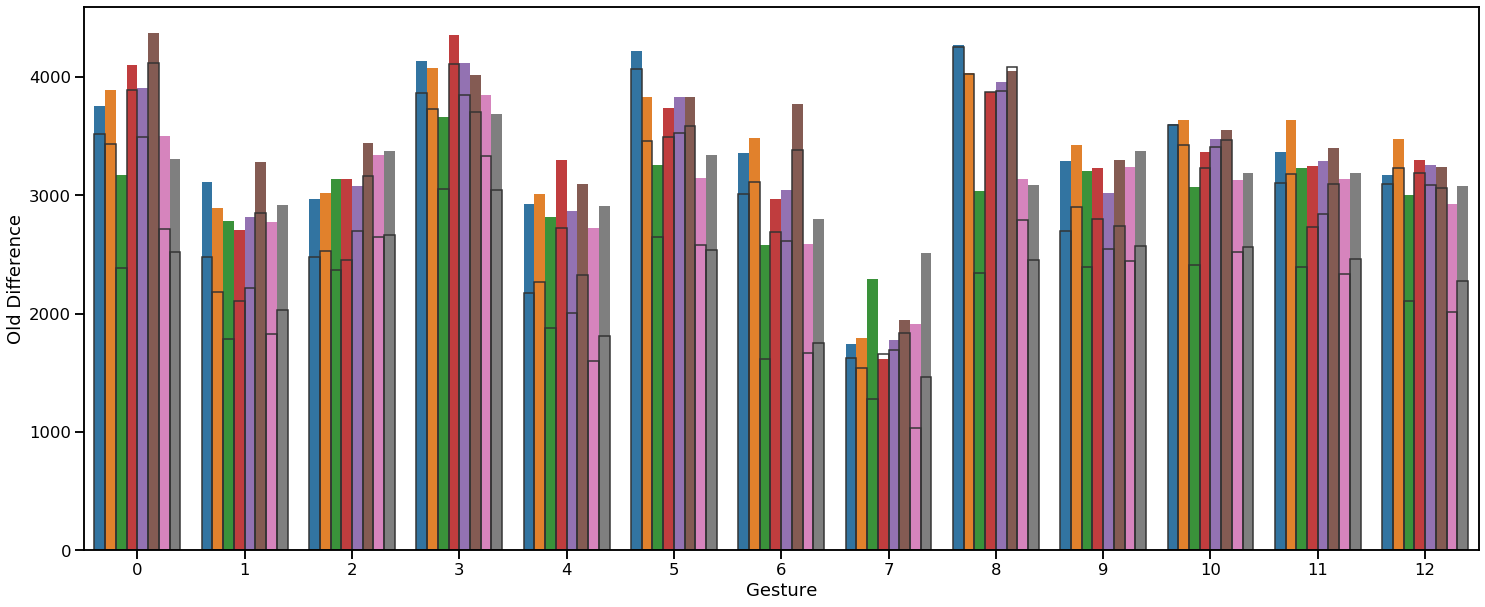

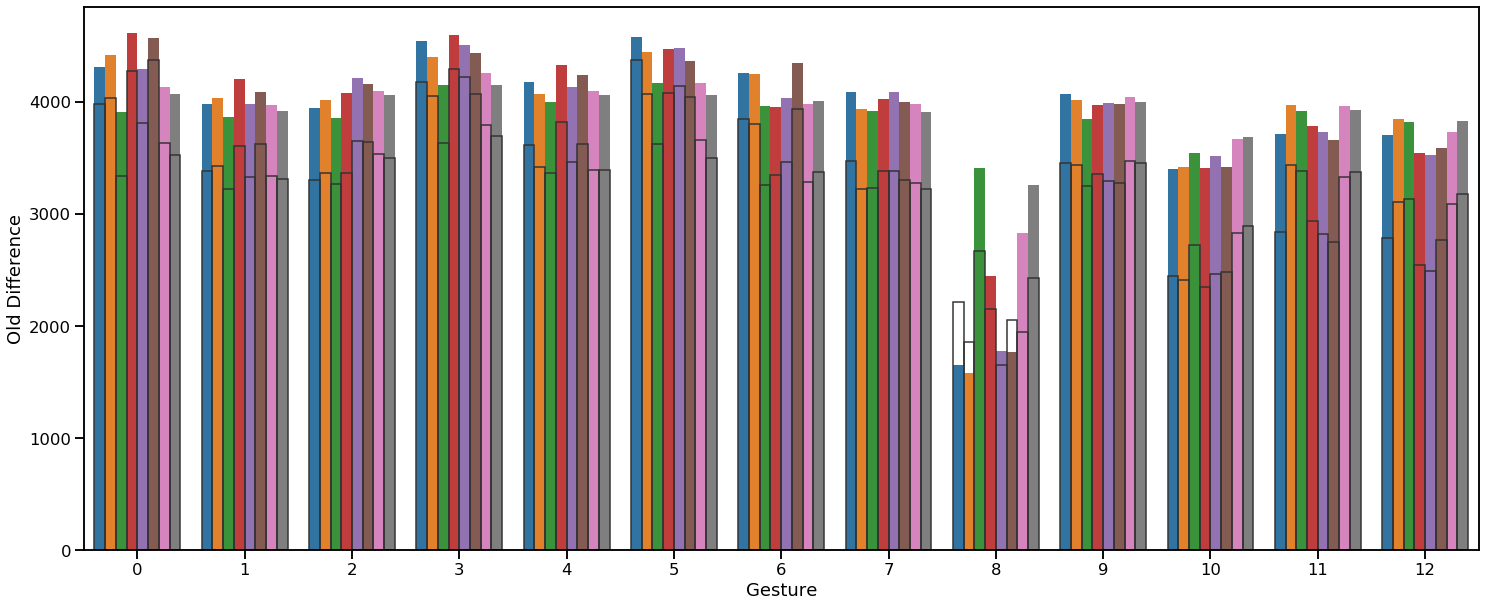

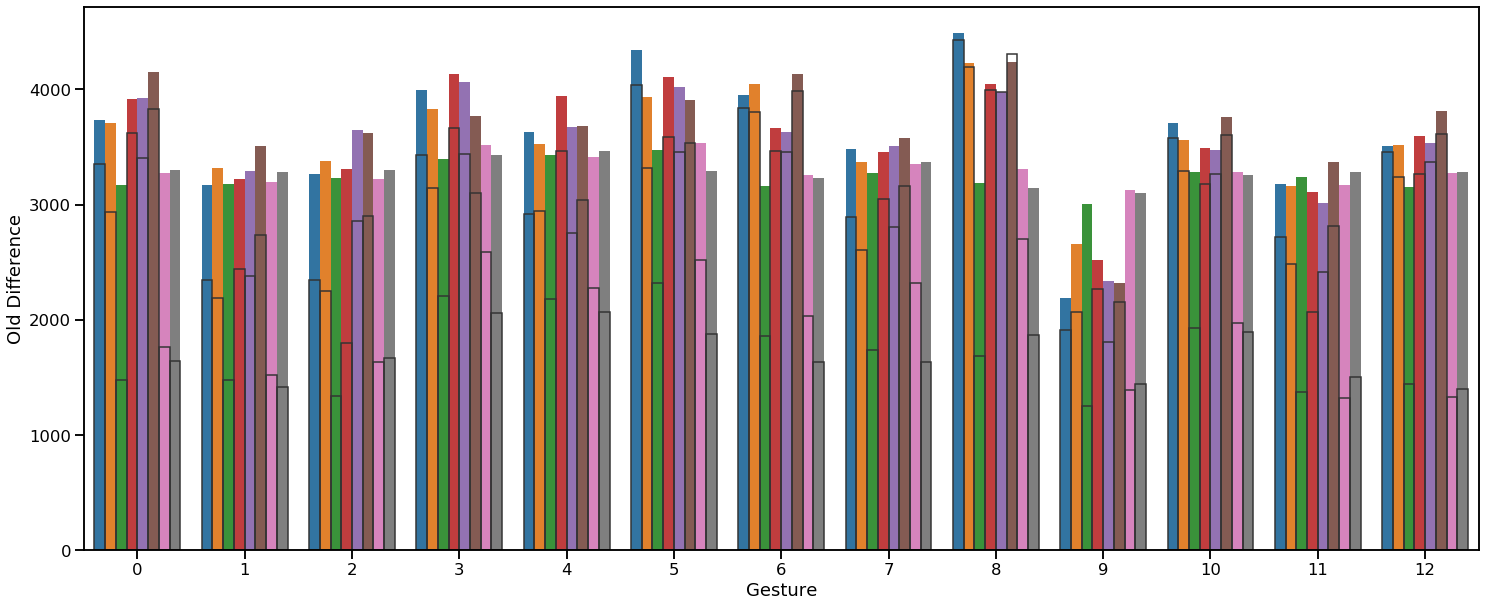

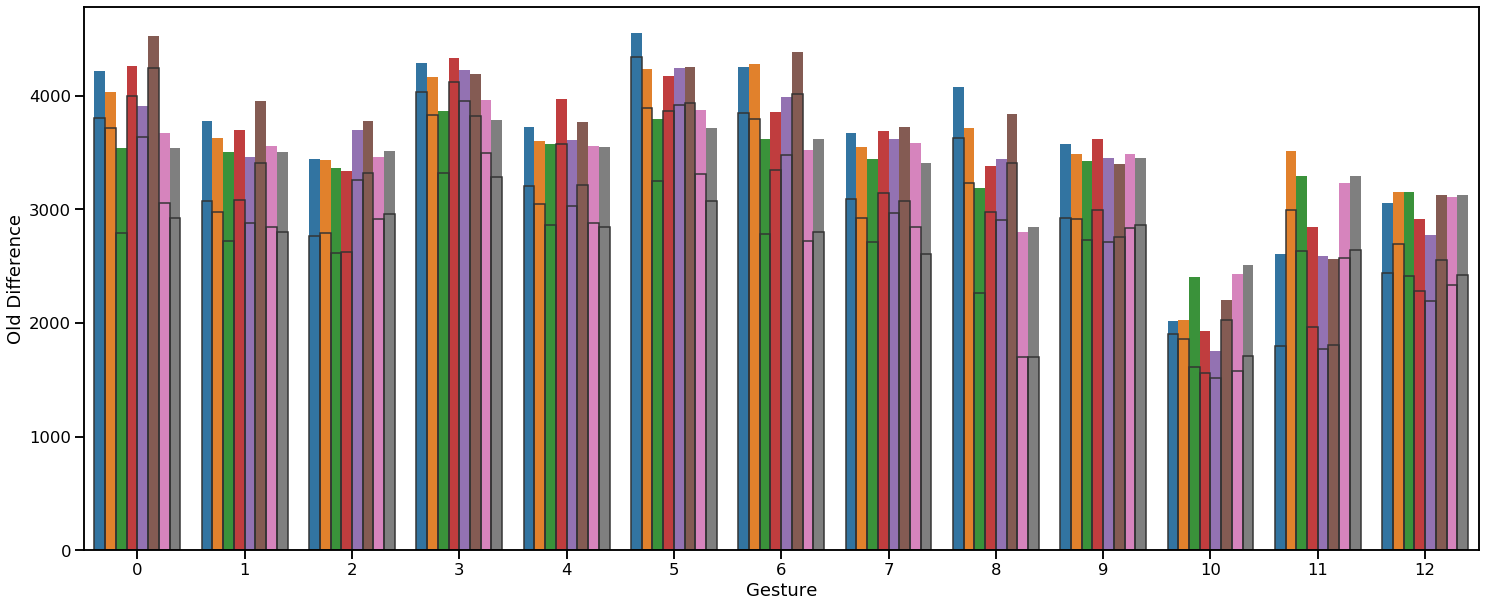

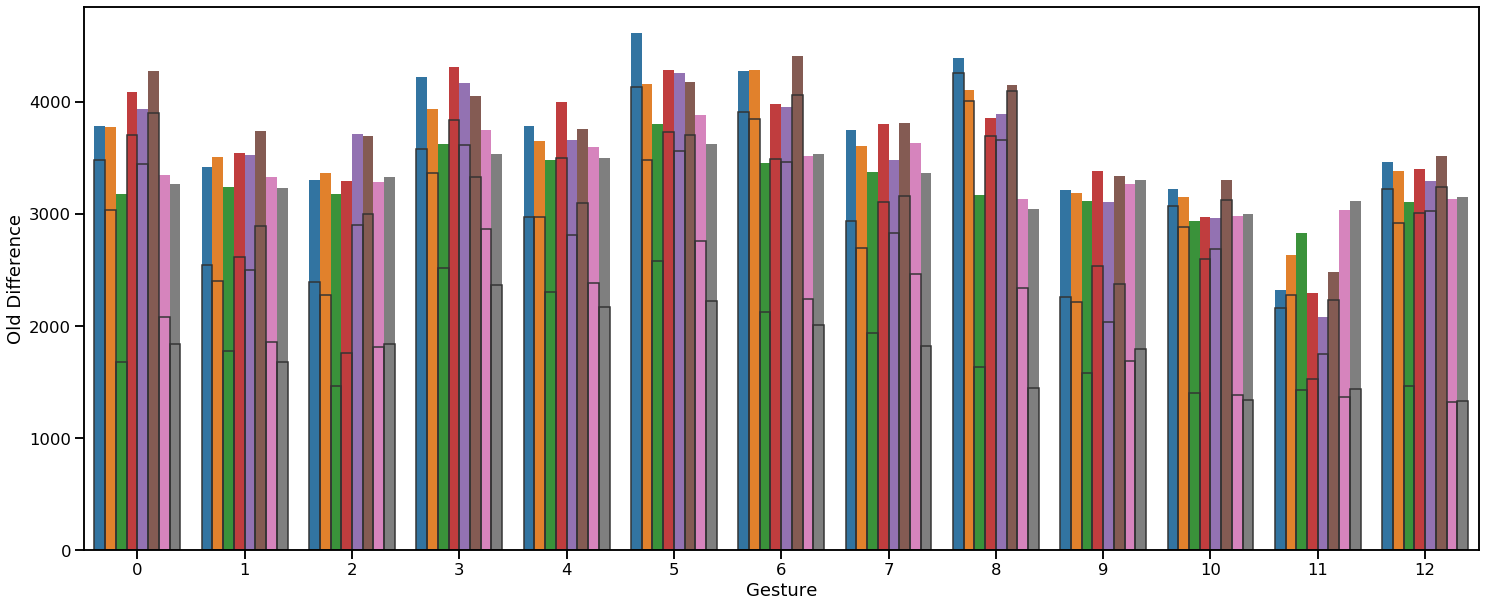

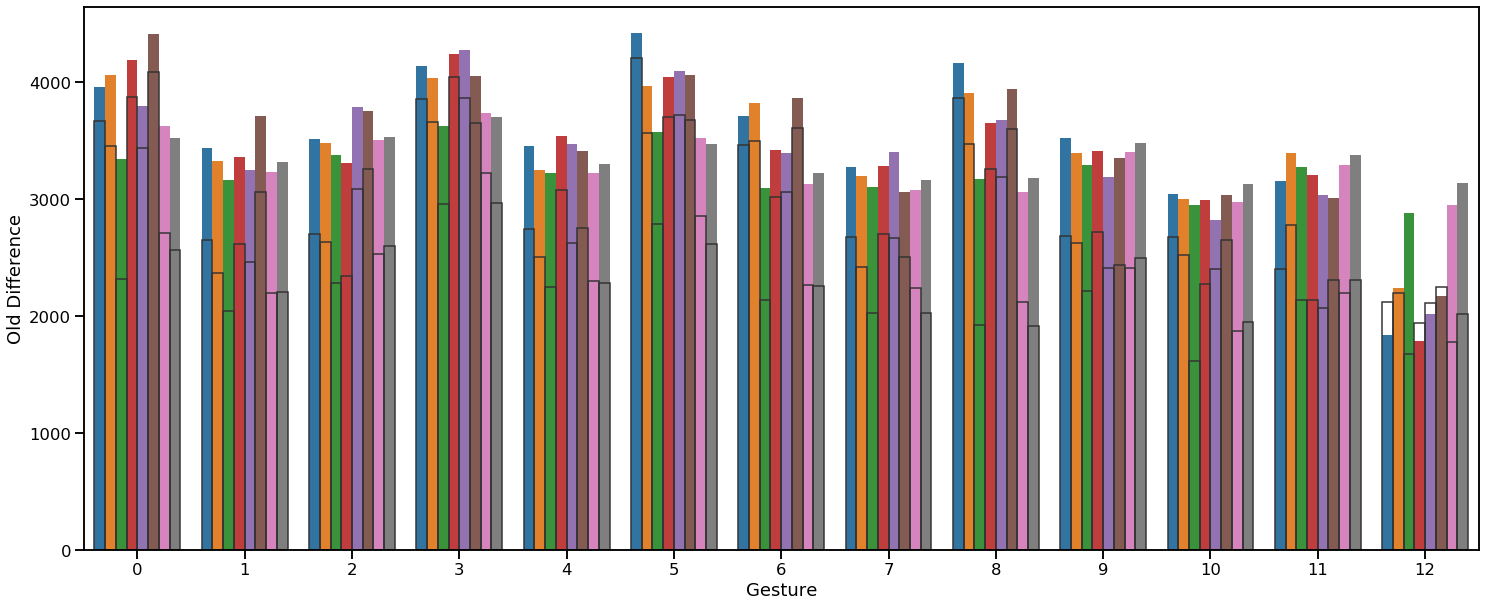

In [514]:
for g in gestures:
    old = d[g]
    new = dNew[g]
    f,ax = plt.subplots(figsize=(25,10))
    df = pd.DataFrame(old,columns=['Old Difference'])
    df['New Difference'] = new
    df['Position'] = np.arange(len(old)) % numPositions
    df['Gesture'] = multLab
    sns.barplot(x='Gesture',y='New Difference',hue='Position',data=df,ax=ax)
    sns.barplot(x='Gesture',y='Old Difference',hue='Position',data=df,edgecolor=".2",facecolor=(1, 1, 1, 0),ax=ax)
    ax.legend_.remove()

In [499]:
old.shape

(104,)

In [500]:
new.shape

(104,)

In [503]:
multLab

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12], dtype=int8)

In [538]:
from sklearn.metrics import accuracy_score

In [545]:
%time d = cdist(hv,cent,'hamming')

CPU times: user 9.64 s, sys: 1.16 s, total: 10.8 s
Wall time: 10.8 s


In [540]:
pred = np.argmin(d,axis=1)
print('Overall accuracy = %f%%' % (accuracy_score(pred,gestLabel)*100))
for p in positions:
    print('Pos %d accuracy = %f%%' % (p,accuracy_score(pred[posLabel==p],gestLabel[posLabel==p])*100))

Overall accuracy = 75.989583%
Pos 0 accuracy = 91.410256%
Pos 1 accuracy = 96.955128%
Pos 2 accuracy = 53.717949%
Pos 3 accuracy = 96.153846%
Pos 4 accuracy = 88.557692%
Pos 5 accuracy = 88.461538%
Pos 6 accuracy = 57.051282%
Pos 7 accuracy = 35.608974%


In [546]:
%time dOpt = cdist(hv,optCent,'hamming')

CPU times: user 10.2 s, sys: 1.02 s, total: 11.2 s
Wall time: 11.2 s


In [542]:
pred = np.argmin(dOpt,axis=1)
print('Overall accuracy = %f%%' % (accuracy_score(pred,gestLabel)*100))
for p in positions:
    print('Pos %d accuracy = %f%%' % (p,accuracy_score(pred[posLabel==p],gestLabel[posLabel==p])*100))

Overall accuracy = 81.262019%
Pos 0 accuracy = 97.083333%
Pos 1 accuracy = 97.820513%
Pos 2 accuracy = 59.615385%
Pos 3 accuracy = 97.435897%
Pos 4 accuracy = 94.038462%
Pos 5 accuracy = 96.346154%
Pos 6 accuracy = 54.903846%
Pos 7 accuracy = 52.852564%


In [543]:
%time dOpt = cdist(hv,multiCent,'hamming')

CPU times: user 1min 11s, sys: 1.71 s, total: 1min 12s
Wall time: 1min 13s


In [544]:
pred = multLab[np.argmin(dOpt,axis=1)]
print('Overall accuracy = %f%%' % (accuracy_score(pred,gestLabel)*100))
for p in positions:
    print('Pos %d accuracy = %f%%' % (p,accuracy_score(pred[posLabel==p],gestLabel[posLabel==p])*100))

Overall accuracy = 98.870192%
Pos 0 accuracy = 99.839744%
Pos 1 accuracy = 99.871795%
Pos 2 accuracy = 98.814103%
Pos 3 accuracy = 99.807692%
Pos 4 accuracy = 100.000000%
Pos 5 accuracy = 99.455128%
Pos 6 accuracy = 96.506410%
Pos 7 accuracy = 96.666667%


In [547]:
pred = np.argmin(d,axis=1)
acc = [accuracy_score(pred[posLabel==p],gestLabel[posLabel==p]) for p in positions]

In [549]:
pred = np.argmin(dOpt,axis=1)
accOpt = [accuracy_score(pred[posLabel==p],gestLabel[posLabel==p]) for p in positions]

In [550]:
acc

[0.9141025641025641,
 0.969551282051282,
 0.5371794871794872,
 0.9615384615384616,
 0.885576923076923,
 0.8846153846153846,
 0.5705128205128205,
 0.3560897435897436]

In [551]:
accOpt

[0.9708333333333333,
 0.9782051282051282,
 0.5961538461538461,
 0.9743589743589743,
 0.9403846153846154,
 0.9634615384615385,
 0.5490384615384616,
 0.528525641025641]

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Position')]

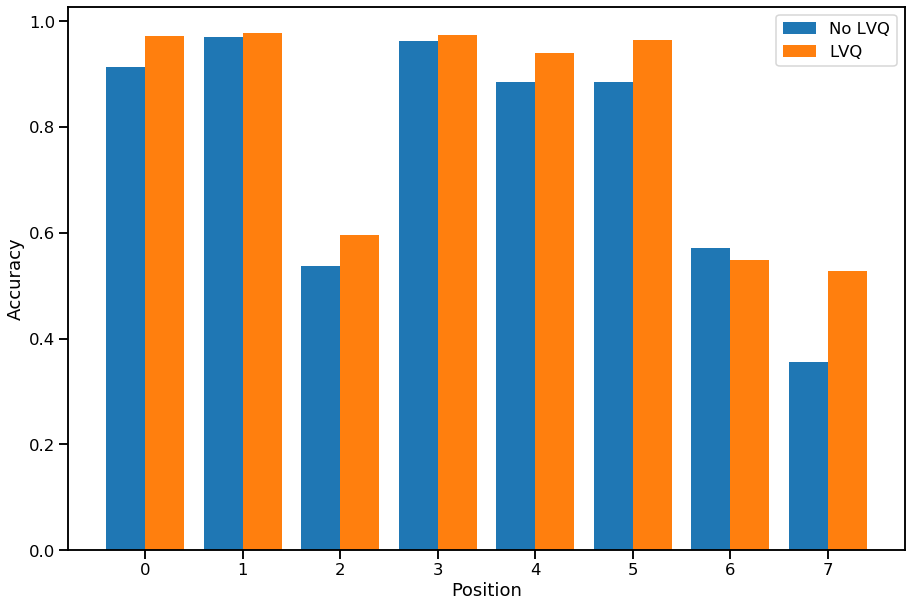

In [605]:
f,ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(numPositions)-0.2,acc,width=0.4)
ax.bar(np.arange(numPositions)+0.2,accOpt,width=0.4)
ax.legend(['No LVQ','LVQ'])
ax.set(xlabel='Position',ylabel='Accuracy')